In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import combinations

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.diagnostic as dg
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
from matplotlib import pyplot as plt

### Sber download

In [86]:
sb = pd.read_csv('SBER_15min.txt', sep=",", parse_dates=['<DATE>'])
sb.columns = ["Ticker", "Per", "Date", "Time", "Open", "High", "Low", "Price", "Volume"]
sb['Returns'] = np.log(sb['Price']) - np.log(sb['Price'].shift(1))
sb

,Ticker,Per,Date,Time,Open,High,Low,Price,Volume,Returns
0,SBER,15,2021-01-04,101500,274.67,274.67,273.10,273.98,2800030,NaN
1,SBER,15,2021-01-04,103000,273.98,274.49,273.60,274.17,1330070,0.000693
2,SBER,15,2021-01-04,104500,274.17,274.25,273.75,274.10,631040,-0.000255
3,SBER,15,2021-01-04,110000,274.13,274.17,273.61,273.94,456130,-0.000584
4,SBER,15,2021-01-04,111500,273.99,274.49,272.54,273.22,2494670,-0.002632
...,...,...,...,...,...,...,...,...,...,...
31144,SBER,15,2023-05-25,230000,243.74,244.00,243.62,243.99,339730,0.001189
31145,SBER,15,2023-05-25,231500,243.99,244.34,243.91,244.24,384720,0.001024
31146,SBER,15,2023-05-25,233000,244.24,244.24,243.84,244.04,229380,-0.000819
31147,SBER,15,2023-05-25,234500,244.04,244.11,243.80,243.87,264600,-0.000697


### VTB download

In [87]:
vtb = pd.read_csv('VTB_15min.txt', sep=",", parse_dates=['<DATE>'])
vtb.columns = ["Ticker", "Per", "Date", "Time", "Open", "High", "Low", "Price", "Volume"]
vtb['Returns'] = np.log(vtb['Price']) - np.log(vtb['Price'].shift(1))
vtb 

,Ticker,Per,Date,Time,Open,High,Low,Price,Volume,Returns
0,VTBR,15,2021-01-04,101500,0.038025,0.038290,0.037975,0.038135,2122620000,NaN
1,VTBR,15,2021-01-04,103000,0.038140,0.038195,0.038085,0.038120,840640000,-0.000393
2,VTBR,15,2021-01-04,104500,0.038120,0.038140,0.038055,0.038125,420710000,0.000131
3,VTBR,15,2021-01-04,110000,0.038130,0.038130,0.038060,0.038090,455790000,-0.000918
4,VTBR,15,2021-01-04,111500,0.038095,0.038135,0.038035,0.038115,410230000,0.000656
...,...,...,...,...,...,...,...,...,...,...
31144,VTBR,15,2023-05-25,230000,0.023135,0.023155,0.023135,0.023150,417140000,0.000648
31145,VTBR,15,2023-05-25,231500,0.023150,0.023160,0.023140,0.023145,941910000,-0.000216
31146,VTBR,15,2023-05-25,233000,0.023145,0.023200,0.023145,0.023195,1134180000,0.002158
31147,VTBR,15,2023-05-25,234500,0.023195,0.023220,0.023170,0.023215,1217370000,0.000862


In [88]:
vtb["Day"] = 1
for i in range(0,31149):
    vtb.Day[i] = vtb["Date"][i].isocalendar()[2]

In [89]:
vtb

,Ticker,Per,Date,Time,Open,High,Low,Price,Volume,Returns,Day
0,VTBR,15,2021-01-04,101500,0.038025,0.038290,0.037975,0.038135,2122620000,NaN,1
1,VTBR,15,2021-01-04,103000,0.038140,0.038195,0.038085,0.038120,840640000,-0.000393,1
2,VTBR,15,2021-01-04,104500,0.038120,0.038140,0.038055,0.038125,420710000,0.000131,1
3,VTBR,15,2021-01-04,110000,0.038130,0.038130,0.038060,0.038090,455790000,-0.000918,1
4,VTBR,15,2021-01-04,111500,0.038095,0.038135,0.038035,0.038115,410230000,0.000656,1
...,...,...,...,...,...,...,...,...,...,...,...
31144,VTBR,15,2023-05-25,230000,0.023135,0.023155,0.023135,0.023150,417140000,0.000648,4
31145,VTBR,15,2023-05-25,231500,0.023150,0.023160,0.023140,0.023145,941910000,-0.000216,4
31146,VTBR,15,2023-05-25,233000,0.023145,0.023200,0.023145,0.023195,1134180000,0.002158,4
31147,VTBR,15,2023-05-25,234500,0.023195,0.023220,0.023170,0.023215,1217370000,0.000862,4


### Creation of parameters SBER

In [90]:
params_sb = [["Ticker", "Date", "Daily_ret", "Intraday_volat", "#_15min", "Daily_volat"]] #[["Ticker", "Date", "Price", "Returns", "Daily_ret", "Intraday_volat", "#_15min", "Daily_volat"]]
for date in sb["Date"].unique():
    temp = sb.loc[sb["Date"] == date]
    ret = np.sum(temp.Returns)
    count = len(temp.Date)
    if len(temp.Date) > 1:
        volat = temp.Returns.std()
        volat_daily = volat * np.sqrt(count)
    params_sb.append(["SBER", date, ret, volat, count, volat_daily])
    
sb_param = pd.DataFrame(params_sb[1:], columns = params_sb[0])
sb_param

,Ticker,Date,Daily_ret,Intraday_volat,#_15min,Daily_volat
0,SBER,2021-01-04,-0.006996,0.001758,55,0.013037
1,SBER,2021-01-05,0.012746,0.001679,56,0.012568
2,SBER,2021-01-06,-0.008967,0.001355,56,0.010140
3,SBER,2021-01-07,-0.000623,0.001355,1,0.010140
4,SBER,2021-01-08,0.038314,0.002368,55,0.017560
...,...,...,...,...,...,...
687,SBER,2023-05-22,-0.000779,0.001087,55,0.008064
688,SBER,2023-05-23,0.021618,0.001889,56,0.014135
689,SBER,2023-05-24,0.040703,0.001714,56,0.012823
690,SBER,2023-05-25,-0.008493,0.001703,56,0.012743


In [91]:
sb_param["Week"] = 1

for i in range(0,692):
    sb_param.Week[i] = sb_param["Date"][i].isocalendar()[1]

sb_param["Year"] = 1
for i in range(0,692):
    sb_param.Year[i] = sb_param["Date"][i].isocalendar()[0]
    
sb_param["Year_Week"] = 1
for i in range(0,692):
    sb_param["Year_Week"][i] = str(sb_param.Year[i])+" "+str(sb_param.Week[i])
    
df = pd.DataFrame(sb_param["Year_Week"].unique()).reset_index()
df.columns = ["week#", "Year_Week"]
sb_param = pd.merge(sb_param, df, on=["Year_Week"])

sb_param

,Ticker,Date,Daily_ret,Intraday_volat,#_15min,Daily_volat,Week,Year,Year_Week,week#
0,SBER,2021-01-04,-0.006996,0.001758,55,0.013037,1,2021,2021 1,0
1,SBER,2021-01-05,0.012746,0.001679,56,0.012568,1,2021,2021 1,0
2,SBER,2021-01-06,-0.008967,0.001355,56,0.010140,1,2021,2021 1,0
3,SBER,2021-01-07,-0.000623,0.001355,1,0.010140,1,2021,2021 1,0
4,SBER,2021-01-08,0.038314,0.002368,55,0.017560,1,2021,2021 1,0
...,...,...,...,...,...,...,...,...,...,...
687,SBER,2023-05-22,-0.000779,0.001087,55,0.008064,21,2023,2023 21,121
688,SBER,2023-05-23,0.021618,0.001889,56,0.014135,21,2023,2023 21,121
689,SBER,2023-05-24,0.040703,0.001714,56,0.012823,21,2023,2023 21,121
690,SBER,2023-05-25,-0.008493,0.001703,56,0.012743,21,2023,2023 21,121


### Creation of parameters VTB

In [92]:
params_vtb = [["Ticker", "Date", "Daily_ret", "Intraday_volat", "#_15min", "Daily_volat"]] #[["Ticker", "Date", "Price", "Returns", "Daily_ret", "Intraday_volat", "#_15min", "Daily_volat"]]
for date in vtb["Date"].unique():
    temp = vtb.loc[vtb["Date"] == date]
    ret = np.sum(temp.Returns)
    count = len(temp.Date)
    if len(temp.Date) > 1:
        volat = temp.Returns.std()
        volat_daily = volat * np.sqrt(count)
    params_vtb.append(["VTBR", date, ret, volat, count, volat_daily])
    
vtb_param = pd.DataFrame(params_vtb[1:], columns = params_vtb[0])
vtb_param

,Ticker,Date,Daily_ret,Intraday_volat,#_15min,Daily_volat
0,VTBR,2021-01-04,-0.004995,0.001528,55,0.011329
1,VTBR,2021-01-05,0.012831,0.001632,56,0.012216
2,VTBR,2021-01-06,-0.005740,0.001374,56,0.010282
3,VTBR,2021-01-07,0.000523,0.001374,1,0.010282
4,VTBR,2021-01-08,0.017885,0.001884,55,0.013975
...,...,...,...,...,...,...
687,VTBR,2023-05-22,-0.010867,0.002650,55,0.019656
688,VTBR,2023-05-23,0.031831,0.003379,56,0.025290
689,VTBR,2023-05-24,0.000423,0.002765,56,0.020695
690,VTBR,2023-05-25,-0.017718,0.002601,56,0.019463


In [93]:
vtb_param["Week"] = 1
for i in range(0,692):
    vtb_param.Week[i] = vtb_param["Date"][i].isocalendar()[1]

vtb_param["Year"] = 1
for i in range(0,692):
    vtb_param.Year[i] = vtb_param["Date"][i].isocalendar()[0]
    
vtb_param["Year_Week"] = 1
for i in range(0,692):
    vtb_param["Year_Week"][i] = str(vtb_param.Year[i])+" "+str(vtb_param.Week[i])

df = pd.DataFrame(vtb_param["Year_Week"].unique()).reset_index()
df.columns = ["week#", "Year_Week"]
vtb_param = pd.merge(vtb_param, df, on=["Year_Week"])

vtb_param

,Ticker,Date,Daily_ret,Intraday_volat,#_15min,Daily_volat,Week,Year,Year_Week,week#
0,VTBR,2021-01-04,-0.004995,0.001528,55,0.011329,1,2021,2021 1,0
1,VTBR,2021-01-05,0.012831,0.001632,56,0.012216,1,2021,2021 1,0
2,VTBR,2021-01-06,-0.005740,0.001374,56,0.010282,1,2021,2021 1,0
3,VTBR,2021-01-07,0.000523,0.001374,1,0.010282,1,2021,2021 1,0
4,VTBR,2021-01-08,0.017885,0.001884,55,0.013975,1,2021,2021 1,0
...,...,...,...,...,...,...,...,...,...,...
687,VTBR,2023-05-22,-0.010867,0.002650,55,0.019656,21,2023,2023 21,121
688,VTBR,2023-05-23,0.031831,0.003379,56,0.025290,21,2023,2023 21,121
689,VTBR,2023-05-24,0.000423,0.002765,56,0.020695,21,2023,2023 21,121
690,VTBR,2023-05-25,-0.017718,0.002601,56,0.019463,21,2023,2023 21,121


In [94]:
# выходные дни удалить? - удаляем
sb_param = sb_param.loc[sb_param["#_15min"]!=1]
vtb_param = vtb_param.loc[vtb_param["#_15min"]!=1]

In [95]:
df_sb = pd.DataFrame(sb_param.groupby(['week#'])['Daily_ret'].std()*np.sqrt(5))
#df_sb['week#_df'] = df_sb.index
df_sb.columns = ["Weekly_volat"] #["Weekly_volat", "week#_df"]

df_vtb = pd.DataFrame(vtb_param.groupby(['week#'])['Daily_ret'].std()*np.sqrt(5))
#df_vtb['week#_df'] = df_vtb.index
df_vtb.columns = ["Weekly_volat"] #["Weekly_volat", "week#_df"]

In [96]:
sb_param = pd.merge(sb_param, df_sb, on=["week#"])
vtb_param = pd.merge(vtb_param, df_vtb, on=["week#"])

In [97]:
sb_param

,Ticker,Date,Daily_ret,Intraday_volat,#_15min,Daily_volat,Week,Year,Year_Week,week#,Weekly_volat
0,SBER,2021-01-04,-0.006996,0.001758,55,0.013037,1,2021,2021 1,0,0.049191
1,SBER,2021-01-05,0.012746,0.001679,56,0.012568,1,2021,2021 1,0,0.049191
2,SBER,2021-01-06,-0.008967,0.001355,56,0.010140,1,2021,2021 1,0,0.049191
3,SBER,2021-01-08,0.038314,0.002368,55,0.017560,1,2021,2021 1,0,0.049191
4,SBER,2021-01-11,0.020069,0.003799,55,0.028175,2,2021,2021 2,1,0.043307
...,...,...,...,...,...,...,...,...,...,...,...
583,SBER,2023-05-19,-0.002201,0.001441,56,0.010782,20,2023,2023 20,120,0.013964
584,SBER,2023-05-22,-0.000779,0.001087,55,0.008064,21,2023,2023 21,121,0.049888
585,SBER,2023-05-23,0.021618,0.001889,56,0.014135,21,2023,2023 21,121,0.049888
586,SBER,2023-05-24,0.040703,0.001714,56,0.012823,21,2023,2023 21,121,0.049888


In [98]:
#############################################
sb_param.loc[sb_param['Date'] == '2022-02-21']

,Ticker,Date,Daily_ret,Intraday_volat,#_15min,Daily_volat,Week,Year,Year_Week,week#,Weekly_volat
289,SBER,2022-02-21,-0.224313,0.021598,67,0.17679,8,2022,2022 8,59,0.486638


In [99]:
# t distribution degrees of freedom estimated from previous files
sb_param["df_t"] = 2.174221422174881
vtb_param["df_t"] = 2.2213992804799556

### Risk-free MOSPRIME

In [100]:
rf = pd.read_excel('mosprime.xlsx', parse_dates=['Date'])
rf["1M"].replace('--', np.NaN, inplace=True)
rf["1M"].astype(float)
rf.dropna(subset=['1M'], inplace=True)
rf = rf.sort_values(by=['Date'])
rf

,Date,ON,1W,2W,1M,2M,3M,6M
611,2020-12-01,4.43,4.50,4.52,4.70,4.82,4.95,4.89
610,2020-12-02,4.42,4.50,4.52,4.73,4.82,4.96,4.88
609,2020-12-03,4.38,4.48,4.51,4.73,4.81,4.96,4.88
608,2020-12-04,4.35,4.46,4.51,4.74,4.80,4.97,4.89
607,2020-12-07,4.14,4.44,4.50,4.74,4.80,4.97,4.90
...,...,...,...,...,...,...,...,...
4,2023-05-23,7.44,7.63,7.69,7.85,8.09,8.34,8.54
3,2023-05-24,7.48,7.65,7.72,7.87,8.10,8.33,8.51
2,2023-05-25,7.45,7.62,7.70,7.87,8.10,8.33,8.51
1,2023-05-26,7.48,7.65,7.72,7.87,8.10,8.33,8.51


In [101]:
rf["Returns_rf"] = np.log(1+rf['1M']/100)/252 #adjust to the daily return

In [102]:
rf

,Date,ON,1W,2W,1M,2M,3M,6M,Returns_rf
611,2020-12-01,4.43,4.50,4.52,4.70,4.82,4.95,4.89,0.000182
610,2020-12-02,4.42,4.50,4.52,4.73,4.82,4.96,4.88,0.000183
609,2020-12-03,4.38,4.48,4.51,4.73,4.81,4.96,4.88,0.000183
608,2020-12-04,4.35,4.46,4.51,4.74,4.80,4.97,4.89,0.000184
607,2020-12-07,4.14,4.44,4.50,4.74,4.80,4.97,4.90,0.000184
...,...,...,...,...,...,...,...,...,...
4,2023-05-23,7.44,7.63,7.69,7.85,8.09,8.34,8.54,0.000300
3,2023-05-24,7.48,7.65,7.72,7.87,8.10,8.33,8.51,0.000301
2,2023-05-25,7.45,7.62,7.70,7.87,8.10,8.33,8.51,0.000301
1,2023-05-26,7.48,7.65,7.72,7.87,8.10,8.33,8.51,0.000301


### Risk-free ...

### Add rf in the tables

In [103]:
#sb_param['risk-free'] = rf.Date.map(rf.set_index('Date')['ON'])
sb_param = pd.merge(sb_param, rf[['Date','Returns_rf']], left_on='Date', right_on='Date', how='left')
vtb_param = pd.merge(vtb_param, rf[['Date','Returns_rf']], left_on='Date', right_on='Date', how='left')

In [104]:
sb_param.loc[sb_param["Returns_rf"].isnull()]

,Ticker,Date,Daily_ret,Intraday_volat,#_15min,Daily_volat,Week,Year,Year_Week,week#,Weekly_volat,df_t,Returns_rf
0,SBER,2021-01-04,-0.006996,0.001758,55,0.013037,1,2021,2021 1,0,0.049191,2.174221,NaN
1,SBER,2021-01-05,0.012746,0.001679,56,0.012568,1,2021,2021 1,0,0.049191,2.174221,NaN
2,SBER,2021-01-06,-0.008967,0.001355,56,0.010140,1,2021,2021 1,0,0.049191,2.174221,NaN
3,SBER,2021-01-08,0.038314,0.002368,55,0.017560,1,2021,2021 1,0,0.049191,2.174221,NaN
35,SBER,2021-02-22,0.011797,0.001908,55,0.014148,8,2021,2021 8,7,0.018563,2.174221,NaN
87,SBER,2021-05-10,0.006271,0.001317,55,0.009769,19,2021,2021 19,18,0.048404,2.174221,NaN
112,SBER,2021-06-14,0.003667,0.001172,55,0.008691,24,2021,2021 24,23,0.019503,2.174221,NaN
215,SBER,2021-11-05,-0.027695,0.002695,55,0.019989,44,2021,2021 44,43,0.063327,2.174221,NaN
255,SBER,2022-01-03,0.039844,0.002090,67,0.017111,1,2022,2022 1,52,0.092992,2.174221,NaN
256,SBER,2022-01-04,-0.003411,0.002194,68,0.018096,1,2022,2022 1,52,0.092992,2.174221,NaN


In [105]:
sb_param.fillna(method='bfill', inplace=True)
sb_param

,Ticker,Date,Daily_ret,Intraday_volat,#_15min,Daily_volat,Week,Year,Year_Week,week#,Weekly_volat,df_t,Returns_rf
0,SBER,2021-01-04,-0.006996,0.001758,55,0.013037,1,2021,2021 1,0,0.049191,2.174221,0.000183
1,SBER,2021-01-05,0.012746,0.001679,56,0.012568,1,2021,2021 1,0,0.049191,2.174221,0.000183
2,SBER,2021-01-06,-0.008967,0.001355,56,0.010140,1,2021,2021 1,0,0.049191,2.174221,0.000183
3,SBER,2021-01-08,0.038314,0.002368,55,0.017560,1,2021,2021 1,0,0.049191,2.174221,0.000183
4,SBER,2021-01-11,0.020069,0.003799,55,0.028175,2,2021,2021 2,1,0.043307,2.174221,0.000183
...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,SBER,2023-05-19,-0.002201,0.001441,56,0.010782,20,2023,2023 20,120,0.013964,2.174221,0.000301
584,SBER,2023-05-22,-0.000779,0.001087,55,0.008064,21,2023,2023 21,121,0.049888,2.174221,0.000301
585,SBER,2023-05-23,0.021618,0.001889,56,0.014135,21,2023,2023 21,121,0.049888,2.174221,0.000300
586,SBER,2023-05-24,0.040703,0.001714,56,0.012823,21,2023,2023 21,121,0.049888,2.174221,0.000301


In [106]:
sb_param.loc[sb_param["Returns_rf"].isnull()]

,Ticker,Date,Daily_ret,Intraday_volat,#_15min,Daily_volat,Week,Year,Year_Week,week#,Weekly_volat,df_t,Returns_rf


In [107]:
vtb_param.fillna(method='bfill', inplace=True)
vtb_param

,Ticker,Date,Daily_ret,Intraday_volat,#_15min,Daily_volat,Week,Year,Year_Week,week#,Weekly_volat,df_t,Returns_rf
0,VTBR,2021-01-04,-0.004995,0.001528,55,0.011329,1,2021,2021 1,0,0.027160,2.221399,0.000183
1,VTBR,2021-01-05,0.012831,0.001632,56,0.012216,1,2021,2021 1,0,0.027160,2.221399,0.000183
2,VTBR,2021-01-06,-0.005740,0.001374,56,0.010282,1,2021,2021 1,0,0.027160,2.221399,0.000183
3,VTBR,2021-01-08,0.017885,0.001884,55,0.013975,1,2021,2021 1,0,0.027160,2.221399,0.000183
4,VTBR,2021-01-11,0.022724,0.003300,55,0.024475,2,2021,2021 2,1,0.028798,2.221399,0.000183
...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,VTBR,2023-05-19,-0.005177,0.003680,56,0.027537,20,2023,2023 20,120,0.052777,2.221399,0.000301
584,VTBR,2023-05-22,-0.010867,0.002650,55,0.019656,21,2023,2023 21,121,0.049025,2.221399,0.000301
585,VTBR,2023-05-23,0.031831,0.003379,56,0.025290,21,2023,2023 21,121,0.049025,2.221399,0.000300
586,VTBR,2023-05-24,0.000423,0.002765,56,0.020695,21,2023,2023 21,121,0.049025,2.221399,0.000301


In [108]:
# from scipy.stats import norm,t
# t.cdf(0, 2, loc=0, scale=1)

In [109]:
from scipy.stats import norm,t
sb_param["Proba_loss"] = 1
length = len(sb_param["Date"])+1
for i in range(0, 588): #len(sb_param["Date"])+1
    sb_param["Proba_loss"].iloc[i] = t.cdf(sb_param["Returns_rf"].iloc[i], sb_param["df_t"].iloc[i], loc=sb_param["Daily_ret"].iloc[i], scale=sb_param["Daily_volat"].iloc[i])
sb_param

,Ticker,Date,Daily_ret,Intraday_volat,#_15min,Daily_volat,Week,Year,Year_Week,week#,Weekly_volat,df_t,Returns_rf,Proba_loss
0,SBER,2021-01-04,-0.006996,0.001758,55,0.013037,1,2021,2021 1,0,0.049191,2.174221,0.000183,0.683390
1,SBER,2021-01-05,0.012746,0.001679,56,0.012568,1,2021,2021 1,0,0.049191,2.174221,0.000183,0.207754
2,SBER,2021-01-06,-0.008967,0.001355,56,0.010140,1,2021,2021 1,0,0.049191,2.174221,0.000183,0.772284
3,SBER,2021-01-08,0.038314,0.002368,55,0.017560,1,2021,2021 1,0,0.049191,2.174221,0.000183,0.075885
4,SBER,2021-01-11,0.020069,0.003799,55,0.028175,2,2021,2021 2,1,0.043307,2.174221,0.000183,0.274141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,SBER,2023-05-19,-0.002201,0.001441,56,0.010782,20,2023,2023 20,120,0.013964,2.174221,0.000301,0.581733
584,SBER,2023-05-22,-0.000779,0.001087,55,0.008064,21,2023,2023 21,121,0.049888,2.174221,0.000301,0.547545
585,SBER,2023-05-23,0.021618,0.001889,56,0.014135,21,2023,2023 21,121,0.049888,2.174221,0.000300,0.130434
586,SBER,2023-05-24,0.040703,0.001714,56,0.012823,21,2023,2023 21,121,0.049888,2.174221,0.000301,0.039367


In [110]:
sb_param["Proba_loss"].mean()

0.4865771712845585

In [111]:
sb_proba_loss = pd.DataFrame(sb_param.groupby(['week#'])['Proba_loss'].std())
sb_proba_loss["Ambiguity"] = 4*sb_proba_loss['Proba_loss']**2
sb_proba_loss

,Proba_loss,Ambiguity
week#,,
0,0.344510,0.474749
1,0.267945,0.287177
2,0.249411,0.248824
3,0.242589,0.235398
4,0.214661,0.184318
...,...,...
117,0.183339,0.134452
118,0.262067,0.274717
119,0.121104,0.058665


In [112]:
vtb_param["Proba_loss"] = 1
length = len(vtb_param["Date"])+1
for i in range(0, 588): #len(sb_param["Date"])+1
    vtb_param["Proba_loss"].iloc[i] = t.cdf(vtb_param["Returns_rf"].iloc[i], vtb_param["df_t"].iloc[i], loc=vtb_param["Daily_ret"].iloc[i], scale=vtb_param["Daily_volat"].iloc[i])
vtb_param

,Ticker,Date,Daily_ret,Intraday_volat,#_15min,Daily_volat,Week,Year,Year_Week,week#,Weekly_volat,df_t,Returns_rf,Proba_loss
0,VTBR,2021-01-04,-0.004995,0.001528,55,0.011329,1,2021,2021 1,0,0.027160,2.221399,0.000183,0.655762
1,VTBR,2021-01-05,0.012831,0.001632,56,0.012216,1,2021,2021 1,0,0.027160,2.221399,0.000183,0.199948
2,VTBR,2021-01-06,-0.005740,0.001374,56,0.010282,1,2021,2021 1,0,0.027160,2.221399,0.000183,0.691216
3,VTBR,2021-01-08,0.017885,0.001884,55,0.013975,1,2021,2021 1,0,0.027160,2.221399,0.000183,0.160918
4,VTBR,2021-01-11,0.022724,0.003300,55,0.024475,2,2021,2021 2,1,0.028798,2.221399,0.000183,0.222923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,VTBR,2023-05-19,-0.005177,0.003680,56,0.027537,20,2023,2023 20,120,0.052777,2.221399,0.000301,0.570463
584,VTBR,2023-05-22,-0.010867,0.002650,55,0.019656,21,2023,2023 21,121,0.049025,2.221399,0.000301,0.688933
585,VTBR,2023-05-23,0.031831,0.003379,56,0.025290,21,2023,2023 21,121,0.049025,2.221399,0.000300,0.163917
586,VTBR,2023-05-24,0.000423,0.002765,56,0.020695,21,2023,2023 21,121,0.049025,2.221399,0.000301,0.497880


In [113]:
vtb_param["Proba_loss"].mean()

0.5029695392273348

In [114]:
vtb_proba_loss = pd.DataFrame(vtb_param.groupby(['week#'])['Proba_loss'].std())
vtb_proba_loss["Ambiguity"] = 4*vtb_proba_loss['Proba_loss']**2
vtb_proba_loss

,Proba_loss,Ambiguity
week#,,
0,0.285479,0.325993
1,0.180109,0.129758
2,0.187504,0.140632
3,0.220678,0.194795
4,0.145786,0.085014
...,...,...
117,0.330236,0.436224
118,0.168176,0.113133
119,0.327739,0.429651


In [276]:
vtb_proba_loss.describe()

,Proba_loss,Ambiguity,week
count,122.000000,122.000000,122.000000
mean,0.238052,0.243330,60.500000
std,0.064795,0.118449,35.362409
min,0.013883,0.000771,0.000000
25%,0.186644,0.139344,30.250000
50%,0.246364,0.242784,60.500000
75%,0.285222,0.325408,90.750000
max,0.367383,0.539881,121.000000


In [277]:
sb_proba_loss.describe()

,Proba_loss,Ambiguity,week
count,122.000000,122.000000,122.000000
mean,0.253597,0.272589,60.500000
std,0.062188,0.123642,35.362409
min,0.087625,0.030713,0.000000
25%,0.209649,0.175815,30.250000
50%,0.257363,0.264955,60.500000
75%,0.302476,0.365974,90.750000
max,0.394683,0.623098,121.000000


In [115]:
sb_param.loc[sb_param['week#'] == 52] #62

,Ticker,Date,Daily_ret,Intraday_volat,#_15min,Daily_volat,Week,Year,Year_Week,week#,Weekly_volat,df_t,Returns_rf,Proba_loss
255,SBER,2022-01-03,0.039844,0.002090,67,0.017111,1,2022,2022 1,52,0.092992,2.174221,0.000343,0.068551
256,SBER,2022-01-04,-0.003411,0.002194,68,0.018096,1,2022,2022 1,52,0.092992,2.174221,0.000343,0.573256
257,SBER,2022-01-05,-0.056011,0.003106,68,0.025613,1,2022,2022 1,52,0.092992,2.174221,0.000343,0.925735
258,SBER,2022-01-06,0.021280,0.002783,68,0.022945,1,2022,2022 1,52,0.092992,2.174221,0.000343,0.225564


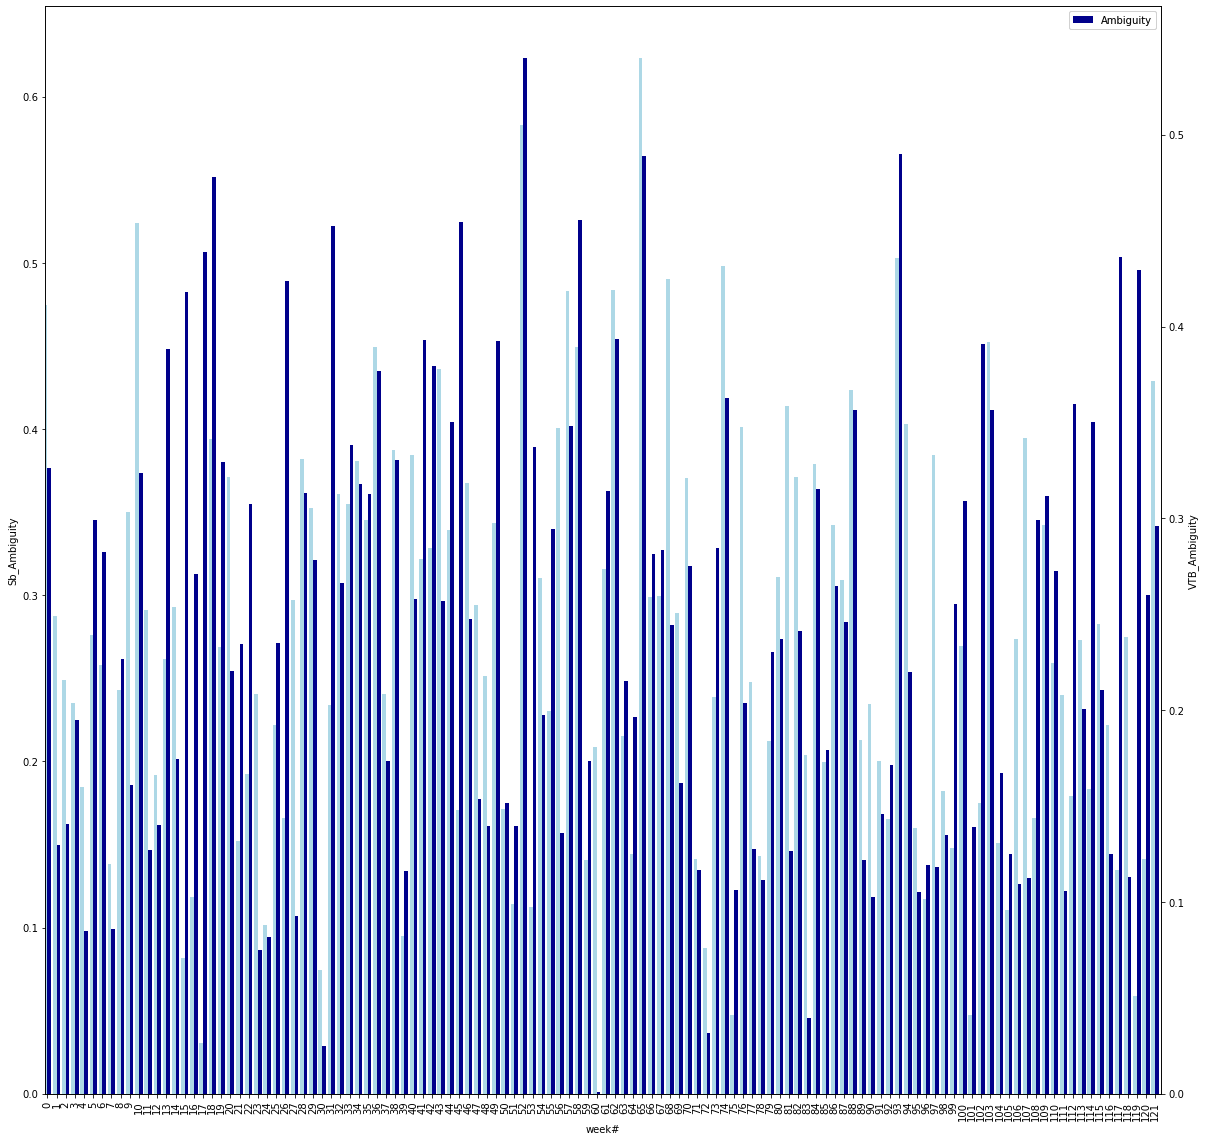

In [116]:
fig = plt.figure(figsize=(20, 20)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

sb_proba_loss.Ambiguity.plot(kind='bar', color='lightblue', ax=ax, width=width, position=1, legend=True)
vtb_proba_loss.Ambiguity.plot(kind='bar', color='darkblue', ax=ax2, width=width, position=0, legend=True)

ax.set_ylabel('Sb_Ambiguity')
ax2.set_ylabel('VTB_Ambiguity')

plt.show()

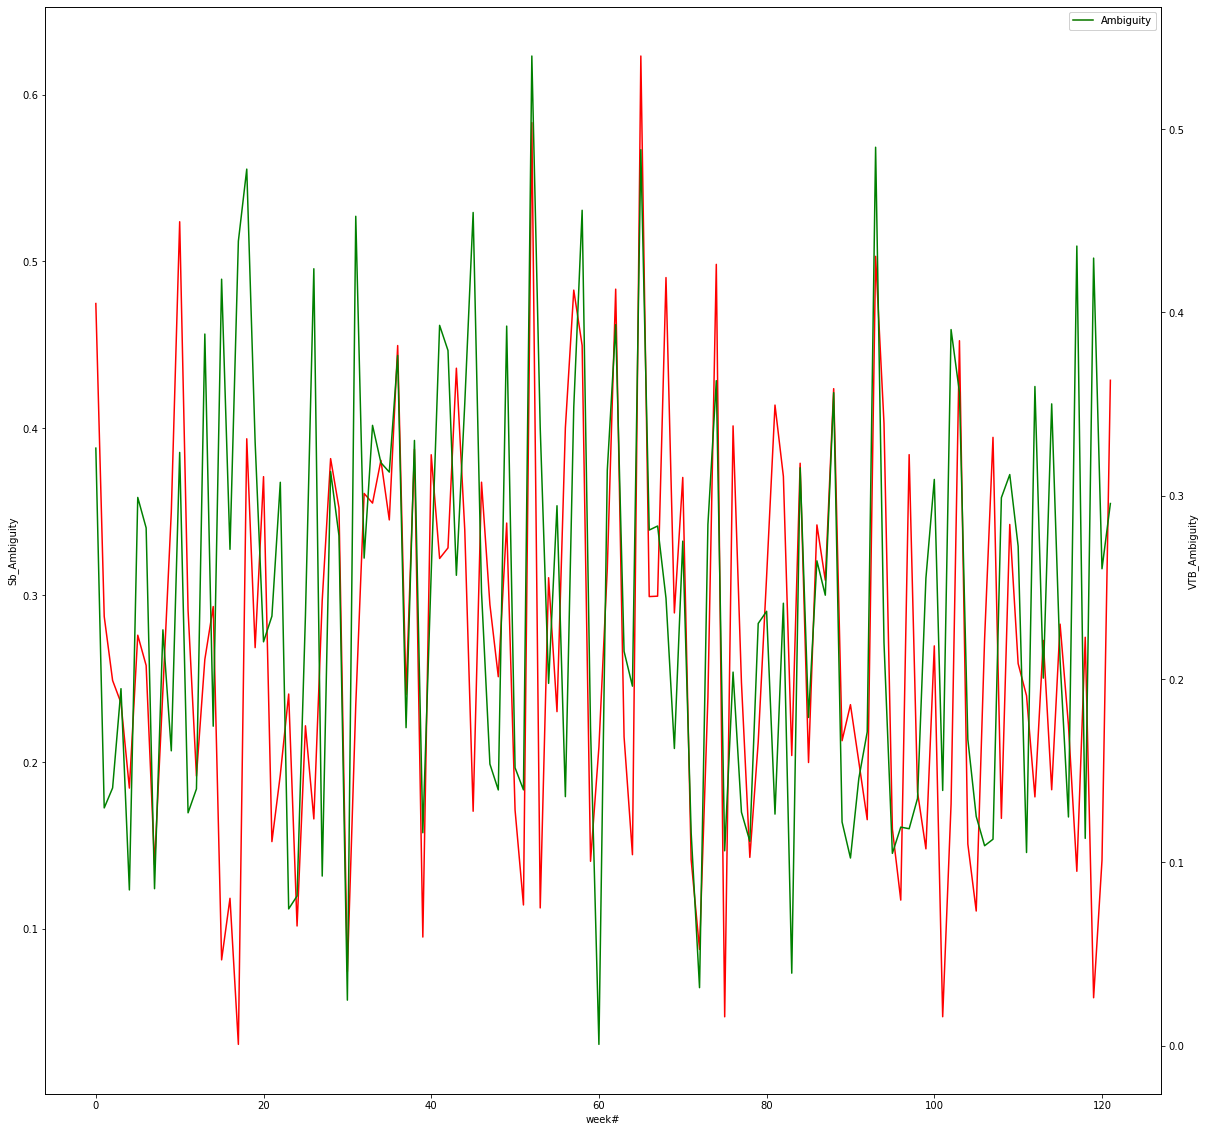

In [117]:
fig = plt.figure(figsize=(20, 20)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

sb_proba_loss.Ambiguity.plot(kind='line', color='red', ax=ax, legend=True)
vtb_proba_loss.Ambiguity.plot(kind='line', color='green', ax=ax2, legend=True)

ax.set_ylabel('Sb_Ambiguity')
ax2.set_ylabel('VTB_Ambiguity')

plt.show()

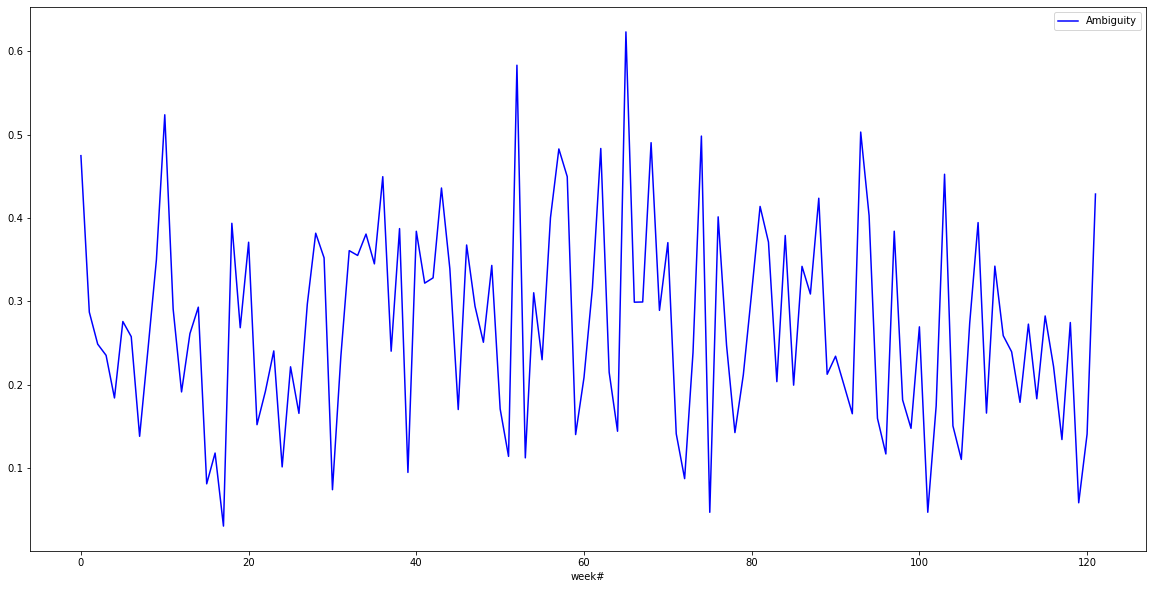

In [273]:
fig = plt.figure(figsize=(20, 10)) # Create matplotlib figure


sb_proba_loss.Ambiguity.plot(kind='line', color='blue', legend=True)

plt.show()

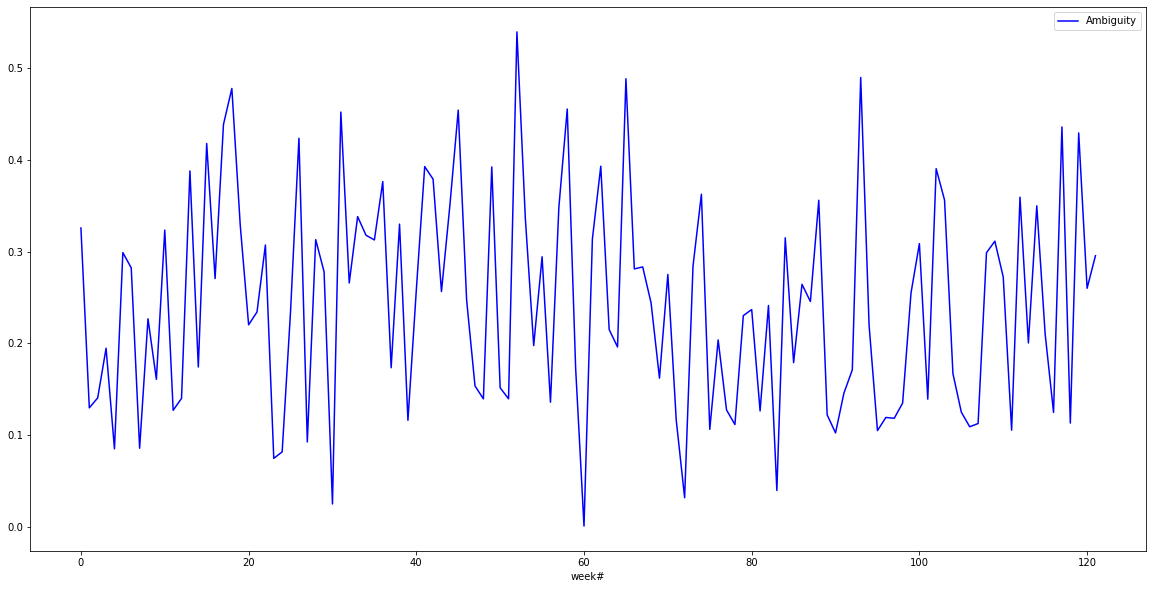

In [274]:
fig = plt.figure(figsize=(20, 10)) # Create matplotlib figure


vtb_proba_loss.Ambiguity.plot(kind='line', color='blue', legend=True)

plt.show()

<AxesSubplot:xlabel='Ambiguity', ylabel='Count'>

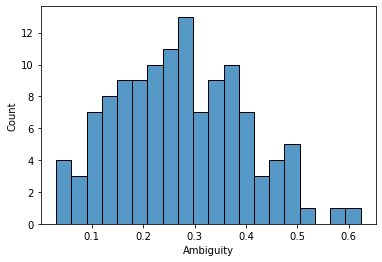

In [119]:
sns.histplot(data=sb_proba_loss, x="Ambiguity", bins = 20)

<AxesSubplot:xlabel='Ambiguity', ylabel='Count'>

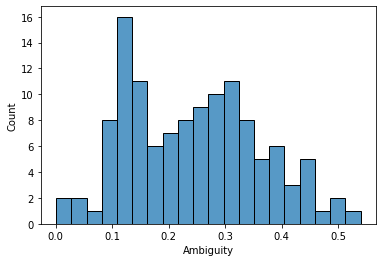

In [120]:
sns.histplot(data=vtb_proba_loss, x="Ambiguity", bins = 20)

In [183]:
vtb_proba_loss["Ambiguity"].mean()

0.24333008643863646

In [184]:
sb_proba_loss["Ambiguity"].mean()

0.2725887625238427

In [185]:
sb_weekly_volat = pd.DataFrame(sb_param.groupby(['week#'])['Daily_ret'].std() * np.sqrt(5))  # 5 - trading days in a week
sb_weekly_volat.columns = ["Volat_market"]
sb_weekly_volat["Volat_market"] = sb_weekly_volat["Volat_market"]**2
sb_weekly_volat["week"] = sb_weekly_volat.index
sb_weekly_volat

,Volat_market,week
week#,,
0,0.002420,0
1,0.001875,1
2,0.001119,2
3,0.001336,3
4,0.000836,4
...,...,...
117,0.000429,117
118,0.001700,118
119,0.003665,119


In [186]:
vtb_weekly_volat = pd.DataFrame(vtb_param.groupby(['week#'])['Daily_ret'].std() * np.sqrt(5))  # 5 - trading days in a week
vtb_weekly_volat.columns = ["Volat_market"]
vtb_weekly_volat["Volat_market"] = vtb_weekly_volat["Volat_market"]**2
vtb_weekly_volat["week"] = vtb_weekly_volat.index
vtb_weekly_volat

,Volat_market,week
week#,,
0,0.000738,0
1,0.000829,1
2,0.000465,2
3,0.000527,3
4,0.000192,4
...,...,...
117,0.009405,117
118,0.001902,118
119,0.007652,119


In [187]:
sb_param

,Ticker,Date,Daily_ret,Intraday_volat,#_15min,Daily_volat,Week,Year,Year_Week,week#,Weekly_volat,df_t,Returns_rf,Proba_loss
0,SBER,2021-01-04,-0.006996,0.001758,55,0.013037,1,2021,2021 1,0,0.049191,2.174221,0.000183,0.683390
1,SBER,2021-01-05,0.012746,0.001679,56,0.012568,1,2021,2021 1,0,0.049191,2.174221,0.000183,0.207754
2,SBER,2021-01-06,-0.008967,0.001355,56,0.010140,1,2021,2021 1,0,0.049191,2.174221,0.000183,0.772284
3,SBER,2021-01-08,0.038314,0.002368,55,0.017560,1,2021,2021 1,0,0.049191,2.174221,0.000183,0.075885
4,SBER,2021-01-11,0.020069,0.003799,55,0.028175,2,2021,2021 2,1,0.043307,2.174221,0.000183,0.274141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,SBER,2023-05-19,-0.002201,0.001441,56,0.010782,20,2023,2023 20,120,0.013964,2.174221,0.000301,0.581733
584,SBER,2023-05-22,-0.000779,0.001087,55,0.008064,21,2023,2023 21,121,0.049888,2.174221,0.000301,0.547545
585,SBER,2023-05-23,0.021618,0.001889,56,0.014135,21,2023,2023 21,121,0.049888,2.174221,0.000300,0.130434
586,SBER,2023-05-24,0.040703,0.001714,56,0.012823,21,2023,2023 21,121,0.049888,2.174221,0.000301,0.039367


### Estimate regression for SBER

In [278]:
sb_ret = pd.DataFrame(sb_param.groupby(['week#']).aggregate({'Daily_ret': 'sum', 'Returns_rf': 'sum'}))
sb_ret.columns = ["Weekly_ret", "Weekly_ret_rf"]
sb_ret["Premium"] = sb_ret['Weekly_ret'] - sb_ret['Weekly_ret_rf']
sb_ret["week"] = sb_ret.index
sb_proba_loss["week"] = sb_proba_loss.index

In [279]:
sb_final = pd.merge(sb_ret[['week', 'Premium']], sb_proba_loss[['week', 'Ambiguity']], left_on='week', right_on='week', how='left')
sb_final = pd.merge(sb_final, sb_weekly_volat, left_on='week', right_on='week', how='left')
sb_final["Ambiguity_1"] = sb_final["Ambiguity"].shift(1)
sb_final["Ambiguity_2"] = sb_final["Ambiguity"].shift(2)
sb_final["Ambiguity_3"] = sb_final["Ambiguity"].shift(3)
sb_final["Volat_1"] = sb_final["Volat_market"].shift(1)
sb_final["Volat_2"] = sb_final["Volat_market"].shift(2)
sb_final["Volat_3"] = sb_final["Volat_market"].shift(3)
sb_final["Volat"] = sb_final["Volat_market"]
sb_final

,week,Premium,Ambiguity,Volat_market,Ambiguity_1,Ambiguity_2,Ambiguity_3,Volat_1,Volat_2,Volat_3,Volat
0,0,0.034364,0.474749,0.002420,NaN,NaN,NaN,NaN,NaN,NaN,0.002420
1,1,-0.024888,0.287177,0.001875,0.474749,NaN,NaN,0.002420,NaN,NaN,0.001875
2,2,-0.032459,0.248824,0.001119,0.287177,0.474749,NaN,0.001875,0.002420,NaN,0.001119
3,3,-0.038517,0.235398,0.001336,0.248824,0.287177,0.474749,0.001119,0.001875,0.002420,0.001336
4,4,0.050322,0.184318,0.000836,0.235398,0.248824,0.287177,0.001336,0.001119,0.001875,0.000836
...,...,...,...,...,...,...,...,...,...,...,...
117,117,0.020323,0.134452,0.000429,0.221977,0.282591,0.183324,0.000819,0.001139,0.000236,0.000429
118,118,-0.012036,0.274717,0.001700,0.134452,0.221977,0.282591,0.000429,0.000819,0.001139,0.001700
119,119,-0.038183,0.058665,0.003665,0.274717,0.134452,0.221977,0.001700,0.000429,0.000819,0.003665
120,120,0.007786,0.141012,0.000195,0.058665,0.274717,0.134452,0.003665,0.001700,0.000429,0.000195


In [280]:
def get_ols(X):
    '''Function for getting OLS Regression model with intercept'''
    x = sm.add_constant(X)
    model = sm.OLS(y, x).fit()
    return model

In [281]:
y = sb_final.Premium[1:]
x = sb_final[['Ambiguity', 'Volat']][1:]
model1_sb = get_ols(x)
model1_sb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     90.64
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           1.42e-24
Time:                        21:02:14   Log-Likelihood:                 195.95
No. Observations:                 121   AIC:                            -385.9
Df Residuals:                     118   BIC:                            -377.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0073      0.011      0.679      0.499      -0.014       0.029
Ambiguity      0.0118      0.036      0.326      0.745      -0.060       0.083
Volat         -2.7482      0.204    -13.460      0.000      -3.153      -2.344
==============================================================================
Omnibus:                       15.062   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               25.295
Skew:                           0.563   Prob(JB):                     3.22e-06
Kurtosis:                       4.936   Cond. No.                         48.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [282]:
y = sb_final.Premium[1:]
x = sb_final[['Ambiguity_1', 'Volat']][1:]
model2_sb = get_ols(x)
model2_sb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     96.80
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           1.31e-25
Time:                        21:02:14   Log-Likelihood:                 198.39
No. Observations:                 121   AIC:                            -390.8
Df Residuals:                     118   BIC:                            -382.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0317      0.010      3.022      0.003       0.011       0.052
Ambiguity_1    -0.0790      0.035     -2.229      0.028      -0.149      -0.009
Volat          -2.6949      0.202    -13.372      0.000      -3.094      -2.296
==============================================================================
Omnibus:                       13.717   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.887
Skew:                           0.511   Prob(JB):                     1.07e-05
Kurtosis:                       4.870   Cond. No.                         48.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [283]:
y = sb_final.Premium[2:]
x = sb_final[['Ambiguity_2', 'Volat']][2:]
model3_sb= get_ols(x)
model3_sb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     91.75
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           1.08e-24
Time:                        21:02:14   Log-Likelihood:                 194.63
No. Observations:                 120   AIC:                            -383.3
Df Residuals:                     117   BIC:                            -374.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0218      0.011      2.025      0.045       0.000       0.043
Ambiguity_2    -0.0413      0.036     -1.131      0.260      -0.114       0.031
Volat          -2.7119      0.206    -13.135      0.000      -3.121      -2.303
==============================================================================
Omnibus:                       14.026   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.592
Skew:                           0.542   Prob(JB):                     1.24e-05
Kurtosis:                       4.829   Cond. No.                         48.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [284]:
y = sb_final.Premium[3:]
x = sb_final[['Ambiguity_3', 'Volat']][3:]
model4_sb = get_ols(x)
model4_sb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     95.04
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           3.63e-25
Time:                        21:02:14   Log-Likelihood:                 194.19
No. Observations:                 119   AIC:                            -382.4
Df Residuals:                     116   BIC:                            -374.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0084      0.011     -0.775      0.440      -0.030       0.013
Ambiguity_3     0.0720      0.036      1.980      0.050   -1.02e-05       0.144
Volat          -2.7990      0.203    -13.782      0.000      -3.201      -2.397
==============================================================================
Omnibus:                       10.634   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               16.473
Skew:                           0.411   Prob(JB):                     0.000265
Kurtosis:                       4.627   Cond. No.                         48.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [285]:
y = sb_final.Premium[3:]
x = sb_final[['Ambiguity', 'Ambiguity_1', 'Ambiguity_2', 'Ambiguity_3', 'Volat', 'Volat_1', 'Volat_2', 'Volat_3']][3:]
model5_sb = get_ols(x)
model5_sb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     27.72
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           4.07e-23
Time:                        21:02:14   Log-Likelihood:                 202.14
No. Observations:                 119   AIC:                            -386.3
Df Residuals:                     110   BIC:                            -361.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0226      0.021      1.096      0.275      -0.018       0.063
Ambiguity       0.0001      0.035      0.003      0.998      -0.070       0.070
Ambiguity_1    -0.0698      0.035     -1.994      0.049      -0.139      -0.000
Ambiguity_2    -0.0363      0.036     -1.018      0.311      -0.107       0.034
Ambiguity_3     0.0517      0.036      1.443      0.152      -0.019       0.123
Volat          -2.7383      0.202    -13.588      0.000      -3.138      -2.339
Volat_1        -0.0145      0.199     -0.073      0.942      -0.410       0.381
Volat_2         0.6336      0.197      3.221      0.002       0.244       1.023
Volat_3        -0.0383      0.200     -0.191      0.849      -0.435       0.359
==============================================================================
Omnibus:                        4.972   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                6.739
Skew:                           0.102   Prob(JB):                       0.0344
Kurtosis:                       4.148   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [286]:
# We check regressions with various combinations of suitable parameters (number of parameters from 1 to 4)
# Change p-value from 0.05 to 0.2
factors = ['Ambiguity', 'Ambiguity_1', 'Ambiguity_2', 'Ambiguity_3', 'Volat', 'Volat_1', 'Volat_2', 'Volat_3']
factors2 = list(combinations(factors, 2))
factors2 = [list(x) for x in factors2]
factors3 = list(combinations(factors, 3))
factors3 = [list(x) for x in factors3]
factors4 = list(combinations(factors, 4))
factors4 = [list(x) for x in factors4]
factors_comb = factors4+factors2+factors3

X = sb_final[3:]
y = sb_final.Premium[3:]

f_stats = []
r_sq = []
for factor in factors_comb:
    print(X[factor])
    print(y)
    model = get_ols(X[factor])
    if False in list(model.pvalues < 0.1):
        f_stats.append('bad_ttest')
        r_sq.append('error')
    elif type(factor) != list:
        f_stats.append(model.f_pvalue) #F-test for 1 factor model, equivalent to t-test
        r_sq.append(model.rsquared)
    else:
        vif_stats = [variance_inflation_factor(X[factor].values, i) for i in range(len(factor))]
        mask = pd.Series(vif_stats) < 10
        if False in list(mask):
            f_stats.append('bad_VIF')
            r_sq.append('error')
        else:
            f_stats.append(model.f_pvalue)
            r_sq.append(model.rsquared)

df_ftest = pd.DataFrame(data={'factors': factors_comb, 'f_test': f_stats, 'r_squared': r_sq})
df_ftest = df_ftest[(df_ftest['f_test'] != 'bad_VIF') & (df_ftest['f_test'] != 'bad_ttest')]
df_ftest = df_ftest[df_ftest['f_test'] < 0.2]
# if len(df_ftest) == 0:
#     print('no suitable parameters')
# else:
#     df_ftest = df_ftest.sort_values(by='r_squared', ascending=False)
#     X_best = df_ftest.head(5)['factors']
    
    
    
#     print(df_ftest)
#     print(np.min(df_ftest['f_test']))
#     X_best = df_ftest[df_ftest['f_test'] == np.min(df_ftest['f_test'])]['factors'].values[0] 
#     X_best = df_ftest[df_ftest['r_squared'] == np.max(df_ftest['r_squared'])]['factors'].values[0]

df_ftest


     Ambiguity  Ambiguity_1  Ambiguity_2  Ambiguity_3
3     0.235398     0.248824     0.287177     0.474749
4     0.184318     0.235398     0.248824     0.287177
5     0.275960     0.184318     0.235398     0.248824
6     0.257830     0.275960     0.184318     0.235398
7     0.138341     0.257830     0.275960     0.184318
..         ...          ...          ...          ...
117   0.134452     0.221977     0.282591     0.183324
118   0.274717     0.134452     0.221977     0.282591
119   0.058665     0.274717     0.134452     0.221977
120   0.141012     0.058665     0.274717     0.134452
121   0.428751     0.141012     0.058665     0.274717

[119 rows x 4 columns]
3     -0.038517
4      0.050322
5     -0.023727
6      0.016063
7     -0.002092
         ...   
117    0.020323
118   -0.012036
119   -0.038183
120    0.007786
121    0.051848
Name: Premium, Length: 119, dtype: float64
     Ambiguity  Ambiguity_1  Ambiguity_2     Volat
3     0.235398     0.248824     0.287177  0.001336
4     0

[119 rows x 4 columns]
3     -0.038517
4      0.050322
5     -0.023727
6      0.016063
7     -0.002092
         ...   
117    0.020323
118   -0.012036
119   -0.038183
120    0.007786
121    0.051848
Name: Premium, Length: 119, dtype: float64
     Ambiguity  Ambiguity_2  Ambiguity_3   Volat_2
3     0.235398     0.287177     0.474749  0.001875
4     0.184318     0.248824     0.287177  0.001119
5     0.275960     0.235398     0.248824  0.001336
6     0.257830     0.184318     0.235398  0.000836
7     0.138341     0.275960     0.184318  0.000948
..         ...          ...          ...       ...
117   0.134452     0.282591     0.183324  0.001139
118   0.274717     0.221977     0.282591  0.000819
119   0.058665     0.134452     0.221977  0.000429
120   0.141012     0.274717     0.134452  0.001700
121   0.428751     0.058665     0.274717  0.003665

[119 rows x 4 columns]
3     -0.038517
4      0.050322
5     -0.023727
6      0.016063
7     -0.002092
         ...   
117    0.020323
118   -0.0

[119 rows x 4 columns]
3     -0.038517
4      0.050322
5     -0.023727
6      0.016063
7     -0.002092
         ...   
117    0.020323
118   -0.012036
119   -0.038183
120    0.007786
121    0.051848
Name: Premium, Length: 119, dtype: float64
     Ambiguity     Volat   Volat_2   Volat_3
3     0.235398  0.001336  0.001875  0.002420
4     0.184318  0.000836  0.001119  0.001875
5     0.275960  0.000948  0.001336  0.001119
6     0.257830  0.000893  0.000836  0.001336
7     0.138341  0.000345  0.000948  0.000836
..         ...       ...       ...       ...
117   0.134452  0.000429  0.001139  0.000236
118   0.274717  0.001700  0.000819  0.001139
119   0.058665  0.003665  0.000429  0.000819
120   0.141012  0.000195  0.001700  0.000429
121   0.428751  0.002489  0.003665  0.001700

[119 rows x 4 columns]
3     -0.038517
4      0.050322
5     -0.023727
6      0.016063
7     -0.002092
         ...   
117    0.020323
118   -0.012036
119   -0.038183
120    0.007786
121    0.051848
Name: Premium, Len

[119 rows x 4 columns]
3     -0.038517
4      0.050322
5     -0.023727
6      0.016063
7     -0.002092
         ...   
117    0.020323
118   -0.012036
119   -0.038183
120    0.007786
121    0.051848
Name: Premium, Length: 119, dtype: float64
     Ambiguity_1  Ambiguity_3   Volat_2   Volat_3
3       0.248824     0.474749  0.001875  0.002420
4       0.235398     0.287177  0.001119  0.001875
5       0.184318     0.248824  0.001336  0.001119
6       0.275960     0.235398  0.000836  0.001336
7       0.257830     0.184318  0.000948  0.000836
..           ...          ...       ...       ...
117     0.221977     0.183324  0.001139  0.000236
118     0.134452     0.282591  0.000819  0.001139
119     0.274717     0.221977  0.000429  0.000819
120     0.058665     0.134452  0.001700  0.000429
121     0.141012     0.274717  0.003665  0.001700

[119 rows x 4 columns]
3     -0.038517
4      0.050322
5     -0.023727
6      0.016063
7     -0.002092
         ...   
117    0.020323
118   -0.012036
119   

[119 rows x 4 columns]
3     -0.038517
4      0.050322
5     -0.023727
6      0.016063
7     -0.002092
         ...   
117    0.020323
118   -0.012036
119   -0.038183
120    0.007786
121    0.051848
Name: Premium, Length: 119, dtype: float64
        Volat   Volat_1   Volat_2   Volat_3
3    0.001336  0.001119  0.001875  0.002420
4    0.000836  0.001336  0.001119  0.001875
5    0.000948  0.000836  0.001336  0.001119
6    0.000893  0.000948  0.000836  0.001336
7    0.000345  0.000893  0.000948  0.000836
..        ...       ...       ...       ...
117  0.000429  0.000819  0.001139  0.000236
118  0.001700  0.000429  0.000819  0.001139
119  0.003665  0.001700  0.000429  0.000819
120  0.000195  0.003665  0.001700  0.000429
121  0.002489  0.000195  0.003665  0.001700

[119 rows x 4 columns]
3     -0.038517
4      0.050322
5     -0.023727
6      0.016063
7     -0.002092
         ...   
117    0.020323
118   -0.012036
119   -0.038183
120    0.007786
121    0.051848
Name: Premium, Length: 119, dt

[119 rows x 2 columns]
3     -0.038517
4      0.050322
5     -0.023727
6      0.016063
7     -0.002092
         ...   
117    0.020323
118   -0.012036
119   -0.038183
120    0.007786
121    0.051848
Name: Premium, Length: 119, dtype: float64
     Ambiguity_2     Volat
3       0.287177  0.001336
4       0.248824  0.000836
5       0.235398  0.000948
6       0.184318  0.000893
7       0.275960  0.000345
..           ...       ...
117     0.282591  0.000429
118     0.221977  0.001700
119     0.134452  0.003665
120     0.274717  0.000195
121     0.058665  0.002489

[119 rows x 2 columns]
3     -0.038517
4      0.050322
5     -0.023727
6      0.016063
7     -0.002092
         ...   
117    0.020323
118   -0.012036
119   -0.038183
120    0.007786
121    0.051848
Name: Premium, Length: 119, dtype: float64
     Ambiguity_2   Volat_1
3       0.287177  0.001119
4       0.248824  0.001336
5       0.235398  0.000836
6       0.184318  0.000948
7       0.275960  0.000893
..           ...       ...
11

[119 rows x 3 columns]
3     -0.038517
4      0.050322
5     -0.023727
6      0.016063
7     -0.002092
         ...   
117    0.020323
118   -0.012036
119   -0.038183
120    0.007786
121    0.051848
Name: Premium, Length: 119, dtype: float64
     Ambiguity  Ambiguity_2  Ambiguity_3
3     0.235398     0.287177     0.474749
4     0.184318     0.248824     0.287177
5     0.275960     0.235398     0.248824
6     0.257830     0.184318     0.235398
7     0.138341     0.275960     0.184318
..         ...          ...          ...
117   0.134452     0.282591     0.183324
118   0.274717     0.221977     0.282591
119   0.058665     0.134452     0.221977
120   0.141012     0.274717     0.134452
121   0.428751     0.058665     0.274717

[119 rows x 3 columns]
3     -0.038517
4      0.050322
5     -0.023727
6      0.016063
7     -0.002092
         ...   
117    0.020323
118   -0.012036
119   -0.038183
120    0.007786
121    0.051848
Name: Premium, Length: 119, dtype: float64
     Ambiguity  Ambigui

     Ambiguity_1  Ambiguity_2   Volat_3
3       0.248824     0.287177  0.002420
4       0.235398     0.248824  0.001875
5       0.184318     0.235398  0.001119
6       0.275960     0.184318  0.001336
7       0.257830     0.275960  0.000836
..           ...          ...       ...
117     0.221977     0.282591  0.000236
118     0.134452     0.221977  0.001139
119     0.274717     0.134452  0.000819
120     0.058665     0.274717  0.000429
121     0.141012     0.058665  0.001700

[119 rows x 3 columns]
3     -0.038517
4      0.050322
5     -0.023727
6      0.016063
7     -0.002092
         ...   
117    0.020323
118   -0.012036
119   -0.038183
120    0.007786
121    0.051848
Name: Premium, Length: 119, dtype: float64
     Ambiguity_1  Ambiguity_3     Volat
3       0.248824     0.474749  0.001336
4       0.235398     0.287177  0.000836
5       0.184318     0.248824  0.000948
6       0.275960     0.235398  0.000893
7       0.257830     0.184318  0.000345
..           ...          ...       .

[119 rows x 3 columns]
3     -0.038517
4      0.050322
5     -0.023727
6      0.016063
7     -0.002092
         ...   
117    0.020323
118   -0.012036
119   -0.038183
120    0.007786
121    0.051848
Name: Premium, Length: 119, dtype: float64
     Ambiguity_2   Volat_1   Volat_2
3       0.287177  0.001119  0.001875
4       0.248824  0.001336  0.001119
5       0.235398  0.000836  0.001336
6       0.184318  0.000948  0.000836
7       0.275960  0.000893  0.000948
..           ...       ...       ...
117     0.282591  0.000819  0.001139
118     0.221977  0.000429  0.000819
119     0.134452  0.001700  0.000429
120     0.274717  0.003665  0.001700
121     0.058665  0.000195  0.003665

[119 rows x 3 columns]
3     -0.038517
4      0.050322
5     -0.023727
6      0.016063
7     -0.002092
         ...   
117    0.020323
118   -0.012036
119   -0.038183
120    0.007786
121    0.051848
Name: Premium, Length: 119, dtype: float64
     Ambiguity_2   Volat_1   Volat_3
3       0.287177  0.001119  0.0024

,factors,f_test,r_squared
77,"[Ambiguity_1, Ambiguity_2]",0.00607231,0.0842394
79,"[Ambiguity_1, Volat]",2.68126e-25,0.622992
93,"[Volat, Volat_2]",8.13841e-27,0.645038
129,"[Ambiguity_1, Volat, Volat_2]",1.11685e-26,0.658064


In [287]:
df_ftest_sb = df_ftest.sort_values(by="r_squared", ascending=False)
df_ftest_sb

,factors,f_test,r_squared
129,"[Ambiguity_1, Volat, Volat_2]",1.11685e-26,0.658064
93,"[Volat, Volat_2]",8.13841e-27,0.645038
79,"[Ambiguity_1, Volat]",2.68126e-25,0.622992
77,"[Ambiguity_1, Ambiguity_2]",0.00607231,0.0842394


In [288]:
X_best_sb = list(df_ftest_sb["factors"])
X_best_sb = X_best_sb[0]

In [289]:
X_best_sb

['Ambiguity_1', 'Volat', 'Volat_2']

In [290]:
y = sb_final.Premium[3:]
x = sb_final[X_best_sb][3:]
model_sb_auto = get_ols(x)
model_sb_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     73.77
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           1.12e-26
Time:                        21:02:18   Log-Likelihood:                 200.31
No. Observations:                 119   AIC:                            -392.6
Df Residuals:                     115   BIC:                            -381.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0273      0.010      2.670      0.009       0.007       0.047
Ambiguity_1    -0.0723      0.035     -2.093      0.039      -0.141      -0.004
Volat          -2.7442      0.194    -14.120      0.000      -3.129      -2.359
Volat_2         0.6628      0.193      3.434      0.001       0.281       1.045
==============================================================================
Omnibus:                        5.693   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                8.540
Skew:                           0.093   Prob(JB):                       0.0140
Kurtosis:                       4.299   Cond. No.                         49.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Two regressions

In [291]:
sb_final_1 = sb_final[:59]
sb_final_1

,week,Premium,Ambiguity,Volat_market,Ambiguity_1,Ambiguity_2,Ambiguity_3,Volat_1,Volat_2,Volat_3,Volat
0,0,0.034364,0.474749,0.002420,NaN,NaN,NaN,NaN,NaN,NaN,0.002420
1,1,-0.024888,0.287177,0.001875,0.474749,NaN,NaN,0.002420,NaN,NaN,0.001875
2,2,-0.032459,0.248824,0.001119,0.287177,0.474749,NaN,0.001875,0.002420,NaN,0.001119
3,3,-0.038517,0.235398,0.001336,0.248824,0.287177,0.474749,0.001119,0.001875,0.002420,0.001336
4,4,0.050322,0.184318,0.000836,0.235398,0.248824,0.287177,0.001336,0.001119,0.001875,0.000836
5,5,-0.023727,0.275960,0.000948,0.184318,0.235398,0.248824,0.000836,0.001336,0.001119,0.000948
6,6,0.016063,0.257830,0.000893,0.275960,0.184318,0.235398,0.000948,0.000836,0.001336,0.000893
7,7,-0.002092,0.138341,0.000345,0.257830,0.275960,0.184318,0.000893,0.000948,0.000836,0.000345
8,8,0.026007,0.242951,0.000911,0.138341,0.257830,0.275960,0.000345,0.000893,0.000948,0.000911
9,9,0.025837,0.349745,0.001633,0.242951,0.138341,0.257830,0.000911,0.000345,0.000893,0.001633


In [292]:
sb_final_2 = sb_final[59:]
sb_final_2

,week,Premium,Ambiguity,Volat_market,Ambiguity_1,Ambiguity_2,Ambiguity_3,Volat_1,Volat_2,Volat_3,Volat
59,59,-0.652378,0.140441,0.236816,0.449597,0.482793,0.400292,0.012640,0.007894,0.005030,0.236816
60,60,0.001268,0.208902,0.013585,0.140441,0.449597,0.482793,0.236816,0.012640,0.007894,0.013585
61,61,0.157203,0.315890,0.012187,0.208902,0.140441,0.449597,0.013585,0.236816,0.012640,0.012187
62,62,-0.076198,0.483369,0.023923,0.315890,0.208902,0.140441,0.012187,0.013585,0.236816,0.023923
63,63,-0.096827,0.215044,0.003348,0.483369,0.315890,0.208902,0.023923,0.012187,0.013585,0.003348
...,...,...,...,...,...,...,...,...,...,...,...
117,117,0.020323,0.134452,0.000429,0.221977,0.282591,0.183324,0.000819,0.001139,0.000236,0.000429
118,118,-0.012036,0.274717,0.001700,0.134452,0.221977,0.282591,0.000429,0.000819,0.001139,0.001700
119,119,-0.038183,0.058665,0.003665,0.274717,0.134452,0.221977,0.001700,0.000429,0.000819,0.003665
120,120,0.007786,0.141012,0.000195,0.058665,0.274717,0.134452,0.003665,0.001700,0.000429,0.000195


In [293]:
factors = ['Ambiguity', 'Ambiguity_1', 'Ambiguity_2', 'Ambiguity_3', 'Volat', 'Volat_1', 'Volat_2', 'Volat_3']
factors2 = list(combinations(factors, 2))
factors2 = [list(x) for x in factors2]
factors3 = list(combinations(factors, 3))
factors3 = [list(x) for x in factors3]
factors4 = list(combinations(factors, 4))
factors4 = [list(x) for x in factors4]
factors_comb = factors4+factors2+factors3

X = sb_final_1[3:]
y = sb_final_1.Premium[3:]

f_stats = []
r_sq = []
for factor in factors_comb:
#     print(X[factor])
#     print(y)
    model = get_ols(X[factor])
    if False in list(model.pvalues < 0.2):
        f_stats.append('bad_ttest')
        r_sq.append('error')
    elif type(factor) != list:
        f_stats.append(model.f_pvalue) #F-test for 1 factor model, equivalent to t-test
        r_sq.append(model.rsquared)
    else:
        vif_stats = [variance_inflation_factor(X[factor].values, i) for i in range(len(factor))]
        mask = pd.Series(vif_stats) < 10
        if False in list(mask):
            f_stats.append('bad_VIF')
            r_sq.append('error')
        else:
            f_stats.append(model.f_pvalue)
            r_sq.append(model.rsquared)

df_ftest_1 = pd.DataFrame(data={'factors': factors_comb, 'f_test': f_stats, 'r_squared': r_sq})
df_ftest_1 = df_ftest_1[(df_ftest_1['f_test'] != 'bad_VIF') & (df_ftest_1['f_test'] != 'bad_ttest')]
df_ftest_1 = df_ftest_1[df_ftest_1['f_test'] < 0.2]

df_ftest_1_sb = df_ftest_1.sort_values(by="r_squared", ascending=False)
df_ftest_1_sb

,factors,f_test,r_squared


In [294]:
factors = ['Ambiguity', 'Ambiguity_1', 'Ambiguity_2', 'Ambiguity_3', 'Volat', 'Volat_1', 'Volat_2', 'Volat_3']
factors2 = list(combinations(factors, 2))
factors2 = [list(x) for x in factors2]
factors3 = list(combinations(factors, 3))
factors3 = [list(x) for x in factors3]
factors4 = list(combinations(factors, 4))
factors4 = [list(x) for x in factors4]
factors_comb = factors4+factors2+factors3

X = sb_final_2[3:]
y = sb_final_2.Premium[3:]

f_stats = []
r_sq = []
for factor in factors_comb:
#     print(X[factor])
#     print(y)
    model = get_ols(X[factor])
    if False in list(model.pvalues < 0.2):
        f_stats.append('bad_ttest')
        r_sq.append('error')
    elif type(factor) != list:
        f_stats.append(model.f_pvalue) #F-test for 1 factor model, equivalent to t-test
        r_sq.append(model.rsquared)
    else:
        vif_stats = [variance_inflation_factor(X[factor].values, i) for i in range(len(factor))]
        mask = pd.Series(vif_stats) < 10
        if False in list(mask):
            f_stats.append('bad_VIF')
            r_sq.append('error')
        else:
            f_stats.append(model.f_pvalue)
            r_sq.append(model.rsquared)

df_ftest_1 = pd.DataFrame(data={'factors': factors_comb, 'f_test': f_stats, 'r_squared': r_sq})
df_ftest_1 = df_ftest_1[(df_ftest_1['f_test'] != 'bad_VIF') & (df_ftest_1['f_test'] != 'bad_ttest')]
df_ftest_1 = df_ftest_1[df_ftest_1['f_test'] < 0.2]

df_ftest_2_sb = df_ftest_1.sort_values(by="r_squared", ascending=False)
df_ftest_2_sb

,factors,f_test,r_squared
95,"[Volat_1, Volat_2]",0.00213597,0.194062
81,"[Ambiguity_1, Volat_2]",0.0267772,0.119288
79,"[Ambiguity_1, Volat]",0.0697778,0.0891881
82,"[Ambiguity_1, Volat_3]",0.0962515,0.0788506


In [295]:
y = sb_final_1.Premium[3:]
x = sb_final_1[X_best_sb][3:]
model_auto_1_sb = get_ols(x)
model_auto_1_sb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     2.060
Date:                Fri, 09 Jun 2023   Prob (F-statistic):              0.117
Time:                        21:02:21   Log-Likelihood:                 109.35
No. Observations:                  56   AIC:                            -210.7
Df Residuals:                      52   BIC:                            -202.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0131      0.013      1.034      0.306      -0.012       0.038
Ambiguity_1    -0.0250      0.040     -0.618      0.539      -0.106       0.056
Volat          -2.9278      1.642     -1.783      0.080      -6.223       0.367
Volat_2        -0.9988      1.870     -0.534      0.596      -4.752       2.754
==============================================================================
Omnibus:                        4.048   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                4.100
Skew:                          -0.166   Prob(JB):                        0.129
Kurtosis:                       4.283   Cond. No.                         470.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [296]:
y = sb_final_2.Premium[3:]
x = sb_final_2[X_best_sb][3:]
model_auto_2_sb = get_ols(x)
model_auto_2_sb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     3.099
Date:                Fri, 09 Jun 2023   Prob (F-statistic):             0.0339
Time:                        21:02:21   Log-Likelihood:                 94.183
No. Observations:                  60   AIC:                            -180.4
Df Residuals:                      56   BIC:                            -172.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0434      0.017      2.619      0.011       0.010       0.077
Ambiguity_1    -0.0862      0.054     -1.596      0.116      -0.194       0.022
Volat          -1.7571      1.431     -1.228      0.225      -4.623       1.109
Volat_2        -2.5361      1.361     -1.864      0.068      -5.262       0.190
==============================================================================
Omnibus:                        1.303   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                0.621
Skew:                           0.075   Prob(JB):                        0.733
Kurtosis:                       3.475   Cond. No.                         234.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [297]:
# RSS for model 1
sb_rss_1 = 1
for i in list(model_auto_1_sb.resid):
    sb_rss_1 += i**2
sb_rss_1

1.0660077418099556

In [298]:
# RSS for model 2
sb_rss_2 = 1
for i in list(model_auto_2_sb.resid):
    sb_rss_2 += i**2
sb_rss_2

1.1521364661693934

In [299]:
# RSS for overall model
sb_rss = 1
for i in list(model_sb_auto.resid):
    sb_rss += i**2
sb_rss

1.2404369080789561

In [300]:
# Chow test
# Chow statisstics
k=5
n1=56
n2=60
chow_sb_auto = ((sb_rss-sb_rss_1-sb_rss_2)/2*k)/((sb_rss_1+sb_rss_2)/(n1+n2-2*k))

In [301]:
chow_sb_auto #significantly higher than the critical value => reject => different ambiguity aversion

-116.8059468548387

### Model check

In [302]:
X_check = ["Ambiguity_1", "Volat"]

In [303]:
y = sb_final_1.Premium[3:]
x = sb_final_1[X_check][3:]
model_check_1_sb = get_ols(x)
model_check_1_sb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     2.987
Date:                Fri, 09 Jun 2023   Prob (F-statistic):             0.0590
Time:                        21:02:21   Log-Likelihood:                 109.20
No. Observations:                  56   AIC:                            -212.4
Df Residuals:                      53   BIC:                            -206.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0122      0.012      0.978      0.332      -0.013       0.037
Ambiguity_1    -0.0254      0.040     -0.632      0.530      -0.106       0.055
Volat          -3.3564      1.423     -2.359      0.022      -6.210      -0.502
==============================================================================
Omnibus:                        3.769   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                3.710
Skew:                          -0.130   Prob(JB):                        0.156
Kurtosis:                       4.234   Cond. No.                         312.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
y = sb_final_2.Premium[3:]
x = sb_final_2[X_check][3:]
model_check_2_sb = get_ols(x)
model_check_2_sb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     2.791
Date:                Fri, 09 Jun 2023   Prob (F-statistic):             0.0698
Time:                        21:02:21   Log-Likelihood:                 92.378
No. Observations:                  60   AIC:                            -178.8
Df Residuals:                      57   BIC:                            -172.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0393      0.017      2.343      0.023       0.006       0.073
Ambiguity_1    -0.0997      0.055     -1.823      0.074      -0.209       0.010
Volat          -2.2421      1.437     -1.560      0.124      -5.120       0.636
==============================================================================
Omnibus:                        1.457   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.483   Jarque-Bera (JB):                0.753
Skew:                          -0.075   Prob(JB):                        0.686
Kurtosis:                       3.528   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [305]:
y = sb_final.Premium[3:]
x = sb_final[X_check][3:]
model_check_sb = get_ols(x)
model_check_sb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     95.84
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           2.68e-25
Time:                        21:02:21   Log-Likelihood:                 194.50
No. Observations:                 119   AIC:                            -383.0
Df Residuals:                     116   BIC:                            -374.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0316      0.011      2.980      0.004       0.011       0.053
Ambiguity_1    -0.0769      0.036     -2.133      0.035      -0.148      -0.005
Volat          -2.6997      0.203    -13.316      0.000      -3.101      -2.298
==============================================================================
Omnibus:                       13.043   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.548
Skew:                           0.491   Prob(JB):                     2.09e-05
Kurtosis:                       4.838   Cond. No.                         47.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [306]:
# RSS for model 1
sb_rss_11 = 1
for i in list(model_check_1_sb.resid):
    sb_rss_11 += i**2
sb_rss_11

1.0663697141699575

In [307]:
# RSS for model 2
sb_rss_21 = 1
for i in list(model_check_2_sb.resid):
    sb_rss_21 += i**2
sb_rss_21

1.161573719336721

In [308]:
# RSS for model
sb_rss_20 = 1
for i in list(model_check_sb.resid):
    sb_rss_20 += i**2
sb_rss_20

1.2650981863064705

In [309]:
# Chow test
# Chow statisstics
k=5
n1=56
n2=60
chow_sb_check = ((sb_rss_20-sb_rss_11-sb_rss_21)/2*k)/((sb_rss_11+sb_rss_21)/(n1+n2-2*k))

In [310]:
chow_sb_check

-114.52444737632084

### Estimate VTB regressions 

In [311]:
vtb_ret = pd.DataFrame(vtb_param.groupby(['week#']).aggregate({'Daily_ret': 'sum', 'Returns_rf': 'sum'}))
vtb_ret.columns = ["Weekly_ret", "Weekly_ret_rf"]
vtb_ret["Premium"] = vtb_ret['Weekly_ret'] - vtb_ret['Weekly_ret_rf']
vtb_ret["week"] = vtb_ret.index
vtb_proba_loss["week"] = vtb_proba_loss.index

In [312]:
vtb_final = pd.merge(vtb_ret[['week', 'Premium']], vtb_proba_loss[['week', 'Ambiguity']], left_on='week', right_on='week', how='left')
vtb_final = pd.merge(vtb_final, vtb_weekly_volat, left_on='week', right_on='week', how='left')
vtb_final["Ambiguity_1"] = vtb_final["Ambiguity"].shift(1)
vtb_final["Ambiguity_2"] = vtb_final["Ambiguity"].shift(2)
vtb_final["Ambiguity_3"] = vtb_final["Ambiguity"].shift(3)
vtb_final["Volat_1"] = vtb_final["Volat_market"].shift(1)
vtb_final["Volat_2"] = vtb_final["Volat_market"].shift(2)
vtb_final["Volat_3"] = vtb_final["Volat_market"].shift(3)
vtb_final["Volat"] = vtb_final["Volat_market"]

In [313]:
# We check regressions with various combinations of suitable parameters (number of parameters from 1 to 3)
# Change p-value from 0.05 to 0.2
factors = ['Ambiguity', 'Ambiguity_1', 'Ambiguity_2', 'Ambiguity_3', 'Volat', 'Volat_1', 'Volat_2', 'Volat_3']
factors2 = list(combinations(factors, 2))
factors2 = [list(x) for x in factors2]
factors3 = list(combinations(factors, 3))
factors3 = [list(x) for x in factors3]
factors4 = list(combinations(factors, 4))
factors4 = [list(x) for x in factors4]
factors_comb = factors4+factors2+factors3

X = vtb_final[3:]
y = vtb_final.Premium[3:]

f_stats = []
r_sq = []
for factor in factors_comb:
    print(X[factor])
    print(y)
    model = get_ols(X[factor])
    if False in list(model.pvalues < 0.1):
        f_stats.append('bad_ttest')
        r_sq.append('error')
    elif type(factor) != list:
        f_stats.append(model.f_pvalue) #F-test for 1 factor model, equivalent to t-test
        r_sq.append(model.rsquared)
    else:
        vif_stats = [variance_inflation_factor(X[factor].values, i) for i in range(len(factor))]
        mask = pd.Series(vif_stats) < 10
        if False in list(mask):
            f_stats.append('bad_VIF')
            r_sq.append('error')
        else:
            f_stats.append(model.f_pvalue)
            r_sq.append(model.rsquared)

df_ftest = pd.DataFrame(data={'factors': factors_comb, 'f_test': f_stats, 'r_squared': r_sq})
df_ftest = df_ftest[(df_ftest['f_test'] != 'bad_VIF') & (df_ftest['f_test'] != 'bad_ttest')]
df_ftest = df_ftest[df_ftest['f_test'] < 0.2]

df_ftest


     Ambiguity  Ambiguity_1  Ambiguity_2  Ambiguity_3
3     0.194795     0.140632     0.129758     0.325993
4     0.085014     0.194795     0.140632     0.129758
5     0.299104     0.085014     0.194795     0.140632
6     0.282491     0.299104     0.085014     0.194795
7     0.085689     0.282491     0.299104     0.085014
..         ...          ...          ...          ...
117   0.436224     0.124806     0.210252     0.350140
118   0.113133     0.436224     0.124806     0.210252
119   0.429651     0.113133     0.436224     0.124806
120   0.260204     0.429651     0.113133     0.436224
121   0.295792     0.260204     0.429651     0.113133

[119 rows x 4 columns]
3     -0.020504
4      0.033030
5     -0.006333
6     -0.010011
7     -0.006107
         ...   
117    0.094501
118   -0.055533
119    0.030871
120    0.061421
121    0.002466
Name: Premium, Length: 119, dtype: float64
     Ambiguity  Ambiguity_1  Ambiguity_2     Volat
3     0.194795     0.140632     0.129758  0.000527
4     0

Name: Premium, Length: 119, dtype: float64
     Ambiguity  Ambiguity_2  Ambiguity_3   Volat_2
3     0.194795     0.129758     0.325993  0.000829
4     0.085014     0.140632     0.129758  0.000465
5     0.299104     0.194795     0.140632  0.000527
6     0.282491     0.085014     0.194795  0.000192
7     0.085689     0.299104     0.085014  0.000576
..         ...          ...          ...       ...
117   0.436224     0.210252     0.350140  0.001000
118   0.113133     0.124806     0.210252  0.001827
119   0.429651     0.436224     0.124806  0.009405
120   0.260204     0.113133     0.436224  0.001902
121   0.295792     0.429651     0.113133  0.007652

[119 rows x 4 columns]
3     -0.020504
4      0.033030
5     -0.006333
6     -0.010011
7     -0.006107
         ...   
117    0.094501
118   -0.055533
119    0.030871
120    0.061421
121    0.002466
Name: Premium, Length: 119, dtype: float64
     Ambiguity  Ambiguity_2  Ambiguity_3   Volat_3
3     0.194795     0.129758     0.325993  0.000738


Name: Premium, Length: 119, dtype: float64
     Ambiguity_1  Ambiguity_2  Ambiguity_3     Volat
3       0.140632     0.129758     0.325993  0.000527
4       0.194795     0.140632     0.129758  0.000192
5       0.085014     0.194795     0.140632  0.000576
6       0.299104     0.085014     0.194795  0.000629
7       0.282491     0.299104     0.085014  0.000181
..           ...          ...          ...       ...
117     0.124806     0.210252     0.350140  0.009405
118     0.436224     0.124806     0.210252  0.001902
119     0.113133     0.436224     0.124806  0.007652
120     0.429651     0.113133     0.436224  0.002785
121     0.260204     0.429651     0.113133  0.002403

[119 rows x 4 columns]
3     -0.020504
4      0.033030
5     -0.006333
6     -0.010011
7     -0.006107
         ...   
117    0.094501
118   -0.055533
119    0.030871
120    0.061421
121    0.002466
Name: Premium, Length: 119, dtype: float64
     Ambiguity_1  Ambiguity_2  Ambiguity_3   Volat_1
3       0.140632     0.12

[119 rows x 4 columns]
3     -0.020504
4      0.033030
5     -0.006333
6     -0.010011
7     -0.006107
         ...   
117    0.094501
118   -0.055533
119    0.030871
120    0.061421
121    0.002466
Name: Premium, Length: 119, dtype: float64
     Ambiguity_1  Ambiguity_3     Volat   Volat_1
3       0.140632     0.325993  0.000527  0.000465
4       0.194795     0.129758  0.000192  0.000527
5       0.085014     0.140632  0.000576  0.000192
6       0.299104     0.194795  0.000629  0.000576
7       0.282491     0.085014  0.000181  0.000629
..           ...          ...       ...       ...
117     0.124806     0.350140  0.009405  0.001827
118     0.436224     0.210252  0.001902  0.009405
119     0.113133     0.124806  0.007652  0.001902
120     0.429651     0.436224  0.002785  0.007652
121     0.260204     0.113133  0.002403  0.002785

[119 rows x 4 columns]
3     -0.020504
4      0.033030
5     -0.006333
6     -0.010011
7     -0.006107
         ...   
117    0.094501
118   -0.055533
119   

Name: Premium, Length: 119, dtype: float64
     Ambiguity_2     Volat   Volat_1   Volat_3
3       0.129758  0.000527  0.000465  0.000738
4       0.140632  0.000192  0.000527  0.000829
5       0.194795  0.000576  0.000192  0.000465
6       0.085014  0.000629  0.000576  0.000527
7       0.299104  0.000181  0.000629  0.000192
..           ...       ...       ...       ...
117     0.210252  0.009405  0.001827  0.017644
118     0.124806  0.001902  0.009405  0.001000
119     0.436224  0.007652  0.001902  0.001827
120     0.113133  0.002785  0.007652  0.009405
121     0.429651  0.002403  0.002785  0.001902

[119 rows x 4 columns]
3     -0.020504
4      0.033030
5     -0.006333
6     -0.010011
7     -0.006107
         ...   
117    0.094501
118   -0.055533
119    0.030871
120    0.061421
121    0.002466
Name: Premium, Length: 119, dtype: float64
     Ambiguity_2     Volat   Volat_2   Volat_3
3       0.129758  0.000527  0.000829  0.000738
4       0.140632  0.000192  0.000465  0.000829
5       0

     Ambiguity_1   Volat_1
3       0.140632  0.000465
4       0.194795  0.000527
5       0.085014  0.000192
6       0.299104  0.000576
7       0.282491  0.000629
..           ...       ...
117     0.124806  0.001827
118     0.436224  0.009405
119     0.113133  0.001902
120     0.429651  0.007652
121     0.260204  0.002785

[119 rows x 2 columns]
3     -0.020504
4      0.033030
5     -0.006333
6     -0.010011
7     -0.006107
         ...   
117    0.094501
118   -0.055533
119    0.030871
120    0.061421
121    0.002466
Name: Premium, Length: 119, dtype: float64
     Ambiguity_1   Volat_2
3       0.140632  0.000829
4       0.194795  0.000465
5       0.085014  0.000527
6       0.299104  0.000192
7       0.282491  0.000576
..           ...       ...
117     0.124806  0.001000
118     0.436224  0.001827
119     0.113133  0.009405
120     0.429651  0.001902
121     0.260204  0.007652

[119 rows x 2 columns]
3     -0.020504
4      0.033030
5     -0.006333
6     -0.010011
7     -0.006107
     

[119 rows x 3 columns]
3     -0.020504
4      0.033030
5     -0.006333
6     -0.010011
7     -0.006107
         ...   
117    0.094501
118   -0.055533
119    0.030871
120    0.061421
121    0.002466
Name: Premium, Length: 119, dtype: float64
     Ambiguity  Ambiguity_1   Volat_1
3     0.194795     0.140632  0.000465
4     0.085014     0.194795  0.000527
5     0.299104     0.085014  0.000192
6     0.282491     0.299104  0.000576
7     0.085689     0.282491  0.000629
..         ...          ...       ...
117   0.436224     0.124806  0.001827
118   0.113133     0.436224  0.009405
119   0.429651     0.113133  0.001902
120   0.260204     0.429651  0.007652
121   0.295792     0.260204  0.002785

[119 rows x 3 columns]
3     -0.020504
4      0.033030
5     -0.006333
6     -0.010011
7     -0.006107
         ...   
117    0.094501
118   -0.055533
119    0.030871
120    0.061421
121    0.002466
Name: Premium, Length: 119, dtype: float64
     Ambiguity  Ambiguity_1   Volat_2
3     0.194795     0.

     Ambiguity_1  Ambiguity_2   Volat_3
3       0.140632     0.129758  0.000738
4       0.194795     0.140632  0.000829
5       0.085014     0.194795  0.000465
6       0.299104     0.085014  0.000527
7       0.282491     0.299104  0.000192
..           ...          ...       ...
117     0.124806     0.210252  0.017644
118     0.436224     0.124806  0.001000
119     0.113133     0.436224  0.001827
120     0.429651     0.113133  0.009405
121     0.260204     0.429651  0.001902

[119 rows x 3 columns]
3     -0.020504
4      0.033030
5     -0.006333
6     -0.010011
7     -0.006107
         ...   
117    0.094501
118   -0.055533
119    0.030871
120    0.061421
121    0.002466
Name: Premium, Length: 119, dtype: float64
     Ambiguity_1  Ambiguity_3     Volat
3       0.140632     0.325993  0.000527
4       0.194795     0.129758  0.000192
5       0.085014     0.140632  0.000576
6       0.299104     0.194795  0.000629
7       0.282491     0.085014  0.000181
..           ...          ...       .

[119 rows x 3 columns]
3     -0.020504
4      0.033030
5     -0.006333
6     -0.010011
7     -0.006107
         ...   
117    0.094501
118   -0.055533
119    0.030871
120    0.061421
121    0.002466
Name: Premium, Length: 119, dtype: float64
     Ambiguity_2     Volat   Volat_3
3       0.129758  0.000527  0.000738
4       0.140632  0.000192  0.000829
5       0.194795  0.000576  0.000465
6       0.085014  0.000629  0.000527
7       0.299104  0.000181  0.000192
..           ...       ...       ...
117     0.210252  0.009405  0.017644
118     0.124806  0.001902  0.001000
119     0.436224  0.007652  0.001827
120     0.113133  0.002785  0.009405
121     0.429651  0.002403  0.001902

[119 rows x 3 columns]
3     -0.020504
4      0.033030
5     -0.006333
6     -0.010011
7     -0.006107
         ...   
117    0.094501
118   -0.055533
119    0.030871
120    0.061421
121    0.002466
Name: Premium, Length: 119, dtype: float64
     Ambiguity_2   Volat_1   Volat_2
3       0.129758  0.000465  0.0008

,factors,f_test,r_squared
51,"[Ambiguity_1, Volat, Volat_1, Volat_2]",7.32637e-29,0.6993
79,"[Ambiguity_1, Volat]",2.77443e-22,0.575057
80,"[Ambiguity_1, Volat_1]",0.000653887,0.118759
81,"[Ambiguity_1, Volat_2]",0.000211414,0.135748
89,"[Ambiguity_3, Volat_1]",0.0262105,0.0608557
128,"[Ambiguity_1, Volat, Volat_1]",3.81653e-23,0.605811
129,"[Ambiguity_1, Volat, Volat_2]",2.2782e-27,0.667428
131,"[Ambiguity_1, Volat_1, Volat_2]",8.84615e-05,0.168882


In [314]:
df_ftest_vtb = df_ftest.sort_values(by="r_squared", ascending=False)
df_ftest_vtb


,factors,f_test,r_squared
51,"[Ambiguity_1, Volat, Volat_1, Volat_2]",7.32637e-29,0.6993
129,"[Ambiguity_1, Volat, Volat_2]",2.2782e-27,0.667428
128,"[Ambiguity_1, Volat, Volat_1]",3.81653e-23,0.605811
79,"[Ambiguity_1, Volat]",2.77443e-22,0.575057
131,"[Ambiguity_1, Volat_1, Volat_2]",8.84615e-05,0.168882
81,"[Ambiguity_1, Volat_2]",0.000211414,0.135748
80,"[Ambiguity_1, Volat_1]",0.000653887,0.118759
89,"[Ambiguity_3, Volat_1]",0.0262105,0.0608557


In [315]:
X_best_vtb = list(df_ftest["factors"])
X_best_vtb = X_best_vtb[0]

In [316]:
X_best_vtb

['Ambiguity_1', 'Volat', 'Volat_1', 'Volat_2']

In [317]:
y = vtb_final.Premium[3:]
x = vtb_final[X_best_vtb][3:]
model_vtb_auto = get_ols(x)
model_vtb_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     66.28
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           7.33e-29
Time:                        21:02:25   Log-Likelihood:                 202.34
No. Observations:                 119   AIC:                            -394.7
Df Residuals:                     114   BIC:                            -380.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0251      0.010      2.566      0.012       0.006       0.044
Ambiguity_1    -0.0875      0.036     -2.434      0.016      -0.159      -0.016
Volat          -1.8864      0.133    -14.181      0.000      -2.150      -1.623
Volat_1        -0.4546      0.131     -3.476      0.001      -0.714      -0.196
Volat_2         0.7961      0.134      5.953      0.000       0.531       1.061
==============================================================================
Omnibus:                        4.837   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                5.408
Skew:                          -0.229   Prob(JB):                       0.0669
Kurtosis:                       3.938   Cond. No.                         35.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [318]:
vtb_final_1 = vtb_final[:59]
vtb_final_1

,week,Premium,Ambiguity,Volat_market,Ambiguity_1,Ambiguity_2,Ambiguity_3,Volat_1,Volat_2,Volat_3,Volat
0,0,0.019247,0.325993,0.000738,NaN,NaN,NaN,NaN,NaN,NaN,0.000738
1,1,0.016023,0.129758,0.000829,0.325993,NaN,NaN,0.000738,NaN,NaN,0.000829
2,2,-0.057190,0.140632,0.000465,0.129758,0.325993,NaN,0.000829,0.000738,NaN,0.000465
3,3,-0.020504,0.194795,0.000527,0.140632,0.129758,0.325993,0.000465,0.000829,0.000738,0.000527
4,4,0.033030,0.085014,0.000192,0.194795,0.140632,0.129758,0.000527,0.000465,0.000829,0.000192
5,5,-0.006333,0.299104,0.000576,0.085014,0.194795,0.140632,0.000192,0.000527,0.000465,0.000576
6,6,-0.010011,0.282491,0.000629,0.299104,0.085014,0.194795,0.000576,0.000192,0.000527,0.000629
7,7,-0.006107,0.085689,0.000181,0.282491,0.299104,0.085014,0.000629,0.000576,0.000192,0.000181
8,8,0.012223,0.226888,0.000641,0.085689,0.282491,0.299104,0.000181,0.000629,0.000576,0.000641
9,9,0.014717,0.160895,0.000835,0.226888,0.085689,0.282491,0.000641,0.000181,0.000629,0.000835


In [319]:
vtb_final_2 = vtb_final[59:]
vtb_final_2

,week,Premium,Ambiguity,Volat_market,Ambiguity_1,Ambiguity_2,Ambiguity_3,Volat_1,Volat_2,Volat_3,Volat
59,59,-0.678582,0.173360,0.345338,0.455739,0.348256,0.135900,0.007392,0.003028,0.001199,0.345338
60,60,-0.140642,0.000771,0.001621,0.173360,0.455739,0.348256,0.345338,0.007392,0.003028,0.001621
61,61,0.247330,0.314035,0.034575,0.000771,0.173360,0.455739,0.001621,0.345338,0.007392,0.034575
62,62,-0.010113,0.393356,0.029230,0.314035,0.000771,0.173360,0.034575,0.001621,0.345338,0.029230
63,63,-0.108551,0.215183,0.003954,0.393356,0.314035,0.000771,0.029230,0.034575,0.001621,0.003954
...,...,...,...,...,...,...,...,...,...,...,...
117,117,0.094501,0.436224,0.009405,0.124806,0.210252,0.350140,0.001827,0.001000,0.017644,0.009405
118,118,-0.055533,0.113133,0.001902,0.436224,0.124806,0.210252,0.009405,0.001827,0.001000,0.001902
119,119,0.030871,0.429651,0.007652,0.113133,0.436224,0.124806,0.001902,0.009405,0.001827,0.007652
120,120,0.061421,0.260204,0.002785,0.429651,0.113133,0.436224,0.007652,0.001902,0.009405,0.002785


In [320]:
y = vtb_final_1.Premium[3:]
x = vtb_final_1[X_best_vtb][3:]
model_auto_1_vtb = get_ols(x)
model_auto_1_vtb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     2.544
Date:                Fri, 09 Jun 2023   Prob (F-statistic):             0.0507
Time:                        21:02:25   Log-Likelihood:                 107.89
No. Observations:                  56   AIC:                            -205.8
Df Residuals:                      51   BIC:                            -195.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0347      0.014      2.469      0.017       0.006       0.063
Ambiguity_1    -0.0971      0.051     -1.901      0.063      -0.200       0.005
Volat          -0.6050      2.201     -0.275      0.785      -5.025       3.815
Volat_1        -2.0075      2.910     -0.690      0.493      -7.850       3.835
Volat_2        -1.5599      2.364     -0.660      0.512      -6.306       3.186
==============================================================================
Omnibus:                        5.742   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                4.718
Skew:                           0.650   Prob(JB):                       0.0945
Kurtosis:                       3.576   Cond. No.                         673.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [321]:
y = vtb_final_2.Premium[3:]
x = vtb_final_2[X_best_vtb][3:]
model_auto_2_vtb = get_ols(x)
model_auto_2_vtb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.096
Date:                Fri, 09 Jun 2023   Prob (F-statistic):              0.368
Time:                        21:02:25   Log-Likelihood:                 96.615
No. Observations:                  60   AIC:                            -183.2
Df Residuals:                      55   BIC:                            -172.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0043      0.017      0.253      0.801      -0.030       0.039
Ambiguity_1     0.0034      0.072      0.047      0.963      -0.141       0.148
Volat           1.2064      1.387      0.870      0.388      -1.574       3.987
Volat_1        -1.8916      1.320     -1.434      0.157      -4.536       0.753
Volat_2        -0.7674      1.018     -0.754      0.454      -2.807       1.272
==============================================================================
Omnibus:                       12.678   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               15.948
Skew:                          -0.823   Prob(JB):                     0.000344
Kurtosis:                       4.915   Cond. No.                         259.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [322]:
# RSS for model 1
vtb_rss_1 = 1
for i in list(model_auto_1_vtb.resid):
    vtb_rss_1 += i**2
vtb_rss_1

1.0695498437574342

In [323]:
# RSS for model 2
vtb_rss_2 = 1
for i in list(model_auto_2_vtb.resid):
    vtb_rss_2 += i**2
vtb_rss_2

1.1402919370641806

In [324]:
# RSS for model
vtb_rss = 1
for i in list(model_vtb_auto.resid):
    vtb_rss += i**2
vtb_rss

1.2323883789588392

In [325]:
# Chow test
# Chow statisstics
k=5
n1=56
n2=60
chow_vtb_auto = ((vtb_rss-vtb_rss_1-vtb_rss_2)/2*k)/((vtb_rss_1+vtb_rss_2)/(n1+n2-2*k))

In [326]:
chow_vtb_auto

-117.21434255683704

### Model Check

In [327]:
y = vtb_final_1.Premium[3:]
x = vtb_final_1[X_check][3:]
model_check_1_vtb = get_ols(x)
model_check_1_vtb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     4.394
Date:                Fri, 09 Jun 2023   Prob (F-statistic):             0.0172
Time:                        21:02:26   Log-Likelihood:                 107.09
No. Observations:                  56   AIC:                            -208.2
Df Residuals:                      53   BIC:                            -202.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0334      0.012      2.690      0.010       0.009       0.058
Ambiguity_1    -0.1152      0.041     -2.792      0.007      -0.198      -0.032
Volat          -1.4471      2.066     -0.700      0.487      -5.591       2.697
==============================================================================
Omnibus:                        4.019   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                3.011
Skew:                           0.508   Prob(JB):                        0.222
Kurtosis:                       3.508   Cond. No.                         435.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [328]:
y = vtb_final_2.Premium[3:]
x = vtb_final_2[X_check][3:]
model_check_2_vtb = get_ols(x)
model_check_2_vtb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.5661
Date:                Fri, 09 Jun 2023   Prob (F-statistic):              0.571
Time:                        21:02:26   Log-Likelihood:                 94.905
No. Observations:                  60   AIC:                            -183.8
Df Residuals:                      57   BIC:                            -177.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0132      0.016      0.839      0.405      -0.018       0.045
Ambiguity_1    -0.0636      0.060     -1.062      0.293      -0.184       0.056
Volat           0.0400      1.219      0.033      0.974      -2.402       2.482
==============================================================================
Omnibus:                        8.052   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.626
Skew:                          -0.678   Prob(JB):                       0.0221
Kurtosis:                       4.102   Cond. No.                         190.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [329]:
y = vtb_final.Premium[3:]
x = vtb_final[X_check][3:]
model_check_vtb = get_ols(x)
model_check_vtb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     78.49
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           2.77e-22
Time:                        21:02:26   Log-Likelihood:                 181.76
No. Observations:                 119   AIC:                            -357.5
Df Residuals:                     116   BIC:                            -349.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0369      0.011      3.318      0.001       0.015       0.059
Ambiguity_1    -0.1302      0.042     -3.134      0.002      -0.213      -0.048
Volat          -1.7985      0.156    -11.548      0.000      -2.107      -1.490
==============================================================================
Omnibus:                       34.908   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.055
Skew:                           0.828   Prob(JB):                     1.18e-37
Kurtosis:                       8.617   Cond. No.                         32.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [330]:
# RSS for model 1
vtb_rss_11 = 1
for i in list(model_check_1_vtb.resid):
    vtb_rss_11 += i**2
vtb_rss_11

1.0715588498404933

In [331]:
# RSS for model 2
vtb_rss_21 = 1
for i in list(model_check_2_vtb.resid):
    vtb_rss_21 += i**2
vtb_rss_21

1.1485198368358955

In [332]:
# RSS for model 2
vtb_rss_20 = 1
for i in list(model_check_vtb.resid):
    vtb_rss_20 += i**2
vtb_rss_20

1.328406571793257

In [333]:
# Chow test
# Chow statisstics
k=5
n1=56
n2=60
chow_vtb_check = ((vtb_rss_20-vtb_rss_11-vtb_rss_21)/2*k)/((vtb_rss_11+vtb_rss_21)/(n1+n2-2*k))

In [334]:
chow_vtb_check

-106.43456552334058

# MOEX estimation

In [69]:
# IMOEX_test.txt
ms = pd.read_csv('IMOEX_test.txt', sep=",", parse_dates=['<DATE>'])
ms.columns = ["Ticker", "Per", "Date", "Time", "Open", "High", "Low", "Price", "Volume"]
ms

,Ticker,Per,Date,Time,Open,High,Low,Price,Volume
0,IMOEX,D,2021-01-04,0,3304.75,3350.81,3304.17,3350.51,66835524820
1,IMOEX,D,2021-01-05,0,3326.06,3365.32,3301.88,3359.15,71655035538
2,IMOEX,D,2021-01-06,0,3375.91,3380.63,3344.43,3371.03,71374633095
3,IMOEX,D,2021-01-08,0,3399.23,3474.66,3397.15,3454.82,131904843837
4,IMOEX,D,2021-01-11,0,3449.91,3516.90,3436.66,3482.48,143248254278
...,...,...,...,...,...,...,...,...,...
584,IMOEX,D,2023-05-19,0,2627.00,2635.80,2612.47,2626.16,58832351511
585,IMOEX,D,2023-05-22,0,2648.30,2652.59,2622.43,2633.26,47570581512
586,IMOEX,D,2023-05-23,0,2641.05,2647.18,2607.66,2641.66,71916771187
587,IMOEX,D,2023-05-24,0,2643.73,2659.68,2626.58,2654.99,71733180049


In [70]:
ms['Returns_market'] = np.log(ms['Price']) - np.log(ms['Price'].shift(1))

In [71]:
ms["Week"] = 1
for i in range(0,589):
    ms.Week[i] = ms["Date"][i].isocalendar()[1]

ms["Year"] = 1
for i in range(0,589):
    ms.Year[i] = ms["Date"][i].isocalendar()[0]
    
ms["Year_Week"] = 1
for i in range(0,589):
    ms["Year_Week"][i] = str(ms.Year[i])+" "+str(ms.Week[i])

df = pd.DataFrame(ms["Year_Week"].unique()).reset_index()
df.columns = ["week#", "Year_Week"]
ms = pd.merge(ms, df, on=["Year_Week"])

ms

,Ticker,Per,Date,Time,Open,High,Low,Price,Volume,Returns_market,Week,Year,Year_Week,week#
0,IMOEX,D,2021-01-04,0,3304.75,3350.81,3304.17,3350.51,66835524820,NaN,1,2021,2021 1,0
1,IMOEX,D,2021-01-05,0,3326.06,3365.32,3301.88,3359.15,71655035538,0.002575,1,2021,2021 1,0
2,IMOEX,D,2021-01-06,0,3375.91,3380.63,3344.43,3371.03,71374633095,0.003530,1,2021,2021 1,0
3,IMOEX,D,2021-01-08,0,3399.23,3474.66,3397.15,3454.82,131904843837,0.024552,1,2021,2021 1,0
4,IMOEX,D,2021-01-11,0,3449.91,3516.90,3436.66,3482.48,143248254278,0.007974,2,2021,2021 2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,IMOEX,D,2023-05-19,0,2627.00,2635.80,2612.47,2626.16,58832351511,-0.002567,20,2023,2023 20,120
585,IMOEX,D,2023-05-22,0,2648.30,2652.59,2622.43,2633.26,47570581512,0.002700,21,2023,2023 21,121
586,IMOEX,D,2023-05-23,0,2641.05,2647.18,2607.66,2641.66,71916771187,0.003185,21,2023,2023 21,121
587,IMOEX,D,2023-05-24,0,2643.73,2659.68,2626.58,2654.99,71733180049,0.005033,21,2023,2023 21,121


In [72]:
ms_weekly_volat = pd.DataFrame(ms.groupby(['week#'])['Returns_market'].std() * np.sqrt(5))  # 5 - trading days in a week
ms_weekly_volat.columns = ["Volat_market"]
ms_weekly_volat["Volat_market"] = ms_weekly_volat["Volat_market"]**2
ms_weekly_volat["week"] = ms_weekly_volat.index

In [73]:
# IMOEX_data.txt
mss = pd.read_csv('IMOEX_data.txt', sep=",", parse_dates=['<DATE>'])
mss.columns = ["Ticker", "Per", "Date", "Time", "Open", "High", "Low", "Price", "Volume"]
mss

,Ticker,Per,Date,Time,Open,High,Low,Price,Volume
0,RI.IMOEX,15,2021-01-04,101500,3306.12,3322.05,3304.17,3321.87,5484192412
1,RI.IMOEX,15,2021-01-04,103000,3321.92,3325.07,3319.87,3320.18,2708825323
2,RI.IMOEX,15,2021-01-04,104500,3320.05,3324.42,3315.06,3322.96,2249274877
3,RI.IMOEX,15,2021-01-04,110000,3322.75,3327.46,3320.64,3325.27,2298990077
4,RI.IMOEX,15,2021-01-04,111500,3325.05,3326.44,3317.23,3324.24,4116548110
...,...,...,...,...,...,...,...,...,...
20626,RI.IMOEX,15,2023-05-25,180000,2646.82,2649.51,2646.44,2649.40,1366501496
20627,RI.IMOEX,15,2023-05-25,181500,2649.45,2650.59,2648.46,2648.79,1267952736
20628,RI.IMOEX,15,2023-05-25,183000,2648.70,2649.93,2648.10,2649.62,1013952934
20629,RI.IMOEX,15,2023-05-25,184500,2649.61,2649.83,2648.60,2649.49,887746164


In [74]:
mss['Returns_market'] = np.log(mss['Price']) - np.log(mss['Price'].shift(1))

In [75]:
mss["Week"] = 1
for i in range(0,589):
    mss.Week[i] = mss["Date"][i].isocalendar()[1]

mss["Year"] = 1
for i in range(0,589):
    mss.Year[i] = mss["Date"][i].isocalendar()[0]
    
mss["Year_Week"] = 1
for i in range(0,589):
    mss["Year_Week"][i] = str(mss.Year[i])+" "+str(mss.Week[i])

df = pd.DataFrame(mss["Year_Week"].unique()).reset_index()
df.columns = ["week#", "Year_Week"]
mss = pd.merge(mss, df, on=["Year_Week"])

mss

,Ticker,Per,Date,Time,Open,High,Low,Price,Volume,Returns_market,Week,Year,Year_Week,week#
0,RI.IMOEX,15,2021-01-04,101500,3306.12,3322.05,3304.17,3321.87,5484192412,NaN,1,2021,2021 1,0
1,RI.IMOEX,15,2021-01-04,103000,3321.92,3325.07,3319.87,3320.18,2708825323,-0.000509,1,2021,2021 1,0
2,RI.IMOEX,15,2021-01-04,104500,3320.05,3324.42,3315.06,3322.96,2249274877,0.000837,1,2021,2021 1,0
3,RI.IMOEX,15,2021-01-04,110000,3322.75,3327.46,3320.64,3325.27,2298990077,0.000695,1,2021,2021 1,0
4,RI.IMOEX,15,2021-01-04,111500,3325.05,3326.44,3317.23,3324.24,4116548110,-0.000310,1,2021,2021 1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,RI.IMOEX,15,2023-05-25,180000,2646.82,2649.51,2646.44,2649.40,1366501496,0.000978,1,1,1,4
20627,RI.IMOEX,15,2023-05-25,181500,2649.45,2650.59,2648.46,2648.79,1267952736,-0.000230,1,1,1,4
20628,RI.IMOEX,15,2023-05-25,183000,2648.70,2649.93,2648.10,2649.62,1013952934,0.000313,1,1,1,4
20629,RI.IMOEX,15,2023-05-25,184500,2649.61,2649.83,2648.60,2649.49,887746164,-0.000049,1,1,1,4


In [81]:
params_ms = [["Ticker", "Date", "Daily_ret", "Intraday_volat", "#_15min", "Daily_volat"]]
for date in mss["Date"].unique():
    temp = mss.loc[mss["Date"] == date]
    ret = np.sum(temp["Returns_market"])
    count = len(temp.Date)
    if len(temp.Date) > 1:
        volat = temp["Returns_market"].std()
        volat_daily = volat * np.sqrt(count)
    params_ms.append(["MOEX", date, ret, volat, count, volat_daily])
    
ms_param = pd.DataFrame(params_ms[1:], columns = params_ms[0])
ms_param

,Ticker,Date,Daily_ret,Intraday_volat,#_15min,Daily_volat
0,MOEX,2021-01-04,0.008585,0.000747,36,0.004480
1,MOEX,2021-01-05,0.002575,0.002290,36,0.013740
2,MOEX,2021-01-06,0.003530,0.001252,36,0.007512
3,MOEX,2021-01-08,0.027817,0.002328,30,0.012749
4,MOEX,2021-01-11,0.004528,0.002856,26,0.014562
...,...,...,...,...,...,...
584,MOEX,2023-05-19,-0.002567,0.001462,36,0.008775
585,MOEX,2023-05-22,0.002700,0.001575,36,0.009449
586,MOEX,2023-05-23,0.003185,0.001587,36,0.009523
587,MOEX,2023-05-24,0.005033,0.001169,36,0.007016


In [84]:
ms_param["Week"] = 1
for i in range(0,692):
    ms_param.Week[i] = ms_param["Date"][i].isocalendar()[1]

ms_param["Year"] = 1
for i in range(0,692):
    ms_param.Year[i] = ms_param["Date"][i].isocalendar()[0]
    
ms_param["Year_Week"] = 1
for i in range(0,692):
    ms_param["Year_Week"][i] = str(ms_param.Year[i])+" "+str(ms_param.Week[i])

df = pd.DataFrame(ms_param["Year_Week"].unique()).reset_index()
df.columns = ["week#", "Year_Week"]
ms_param = pd.merge(ms_param, df, on=["Year_Week"])

ms_param


KeyError: 589

In [12]:
# выходные дни удалить? - удаляем
sb_param = sb_param.loc[sb_param["#_15min"]!=1]
vtb_param = vtb_param.loc[vtb_param["#_15min"]!=1]

In [13]:
df_sb = pd.DataFrame(sb_param.groupby(['week#'])['Daily_ret'].std()*np.sqrt(5))
#df_sb['week#_df'] = df_sb.index
df_sb.columns = ["Weekly_volat"] #["Weekly_volat", "week#_df"]

df_vtb = pd.DataFrame(vtb_param.groupby(['week#'])['Daily_ret'].std()*np.sqrt(5))
#df_vtb['week#_df'] = df_vtb.index
df_vtb.columns = ["Weekly_volat"] #["Weekly_volat", "week#_df"]

In [14]:
sb_param = pd.merge(sb_param, df_sb, on=["week#"])
vtb_param = pd.merge(vtb_param, df_vtb, on=["week#"])

In [15]:
sb_param

,Ticker,Date,Daily_ret,Intraday_volat,#_15min,Daily_volat,Week,Year,Year_Week,week#,Weekly_volat
0,SBER,2021-01-04,-0.006996,0.001758,55,0.013037,1,2021,2021 1,0,0.049191
1,SBER,2021-01-05,0.012746,0.001679,56,0.012568,1,2021,2021 1,0,0.049191
2,SBER,2021-01-06,-0.008967,0.001355,56,0.010140,1,2021,2021 1,0,0.049191
3,SBER,2021-01-08,0.038314,0.002368,55,0.017560,1,2021,2021 1,0,0.049191
4,SBER,2021-01-11,0.020069,0.003799,55,0.028175,2,2021,2021 2,1,0.043307
...,...,...,...,...,...,...,...,...,...,...,...
583,SBER,2023-05-19,-0.002201,0.001441,56,0.010782,20,2023,2023 20,120,0.013964
584,SBER,2023-05-22,-0.000779,0.001087,55,0.008064,21,2023,2023 21,121,0.049888
585,SBER,2023-05-23,0.021618,0.001889,56,0.014135,21,2023,2023 21,121,0.049888
586,SBER,2023-05-24,0.040703,0.001714,56,0.012823,21,2023,2023 21,121,0.049888


In [16]:
#############################################
sb_param.loc[sb_param['Date'] == '2022-02-21']

,Ticker,Date,Daily_ret,Intraday_volat,#_15min,Daily_volat,Week,Year,Year_Week,week#,Weekly_volat
289,SBER,2022-02-21,-0.224313,0.021598,67,0.17679,8,2022,2022 8,59,0.486638


In [17]:
# t distribution degrees of freedom estimated from previous files
sb_param["df_t"] = 2.174221422174881
vtb_param["df_t"] = 2.2213992804799556

In [ ]:
!pip install chowtest

In [ ]:
from chow_test import chow_test 

chow_test(y=sb_final.Premium[3:], X=sb_final[X_best][3:],
         last_index_in_model_1=58,
         first_index_in_model_2=59,
         significance_level=.05)

In [ ]:
y = sb_final.Premium[3:]
x = sb_final[X_best][3:]
model_auto = get_ols(x)
model_auto.summary()

In [ ]:
git clone https://github.com/jtloong/chow-test.git
cd chow-test
pip install 